# Building a healthier tomorrow: Reducing hospital readmissions today

![Screenshot 2023-02-09 at 6.14.31 PM](Screenshot%202023-02-09%20at%206.14.31%20PM.png)


# 1. Introduction

## 1.1 Background
We work for a consulting company helping a hospital group better understand patient readmissions. The hospital gave us access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want us to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission. 

They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

## 1.2 The data
We have access to ten years of patient information ([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

#### Information in the file
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 

***Acknowledgments**: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records," BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.*

## 1.3 Methods
At the first stage, and throughout the exploratory analysis phase some preliminary data transformations were conducted
including:
* handling missing values and duplicates in the dataset
* summary statistics (number of rows and columns, altering variable types, finding age range, dispersion of data, min and max values, etc.)
* aggregating data (such as grouping variables, summarizing measures and mutating columns)
* feature scaling (also known as data normalization), necessary for implementing machine learning model


# 2. Exploratory Analysis

#### Figure 1: Number of Patients by Age Group
![1](s1.jpg)

Figure 1 shows that the patients in the dataset are grouped into six age brackets: 
- [40-50),
- [50-60),
- [60-70),
- [70-80),
- [80-90),
- [90-100).


The highest number of patients are in the [70-80) age bracket, with 6,837 patients, followed by the [60-70) age bracket with 5,913 patients. The [90-100) age bracket has the lowest number of patients, with only 750 patients.

#### Figure 2. Time in Hospital  by Age Group
![2](s2.jpg)

Figure 2 shows:

- a strange peak for patients in the [70-80) and [80-90) age group. The dark blue and pink lines show a similar pattern in which hospital stays tend to rise in a high pace (from 1-3 days) compared to the other age groups.
- All age groups except for [90-100) have a somewhat similar trend, often staying 3 days in hospital the majority of the time . Only a small percentage of patients in those age groups stay for longer than 3 days (we can see this by the downtrend of all line plots). On the other hand, the grey line plot shows a steady trend for patients in the [90-100) age range. In other words, even though the peak is at 3-4 days, patients in the [90-100) mark typically stay far longer in hospital.

#### Figure 3. Boxplots For Different Variables 
![3](s3.jpg)


1. Starting from the left, the first plot shows that patients time in hospital tends to increase as the age increases. This can be seen by the mean, the 1st and 3rd quartile. The time_in_hospital variable ranges from 1 to 14 days. The majority of patients stayed in the hospital for less than 6 days, with 25% of patients staying for 2 days or less.

2. Moving to the next box plot we notice that patients in the age groups of 40-80 have undergone 1 procedure on avergae whereas patients older than that have undergone 0 procedures on average. Based on our summary statistics, the n_procedures variable has a mean value of 1.35 and ranges from 0 to 6 procedures. In summary, the majority of patients did not undergo any procedures, with 75% of patients undergoing 2 procedures or less.

3. The n_lab_procedures box plot shows that patients have undergone about 43 lab procedures on average. These procedures range from 1 to 113. The majority of patients underwent 60 or fewer lab procedures, with 25% of patients undergoing 30 or fewer. We also see some outliers in the 50-60 and 60-70 age mark meaning that some patients in those age marks underwent an extremely high amount of lab procedures.

4. The n_medications box plot shows that patients tend to receive 16 medications on average. The amount of medications range from 1 to 79. The majority of patients were prescribed 20 or fewer medications, with 25% of patients being prescribed 11 or fewer.

#### Figure 4. Procedures by Age Group &
#### Figure 5. Distribution of Emergencies
![4](s4.jpg)


- Figure 4 shows that the general frequency of patients who had procedures tends to decrease as the number of procedures increases. In terms of differences between age categories, there are some notable patterns as well. For example, the age category [60-70) have the highest frequency of patients who had 3,4,5 or 6 procedures. If compared to the [70-80) age mark (which have about the same number of patients ~ see Figure 1), one question comes in mind: Why are older patients undergoing more procedures ?

- Figure 5 shows a distribution that appears to be right-skewed. Overall, this plot suggests that emergency admissions are relatively rare among the patients in the dataset, and that when they do occur, they are typically limited to one admission per patient.



#### Figure 6. Distribution of Medications & 
#### Figure 7. Number of Lab Procedures by Age Group
![5](s5.jpg)


- Figure 6 suggests that the distribution is right-skewed.
- Figure 7 shows a large spike in the frequency of observations with n_lab_procedures = 1 for the age group 40-50. This suggests that there may be a specific reason why this age group has a higher proportion of patients with only one lab procedure, which could be related to the underlying medical conditions or treatments for this age group. This should be analysed further.

#### Further analysis suggests that there is no high (positive-negative) correlation between number of Lab Procedures and other variables in the dataset. This occurrence could be based on random chance.

*** We may also want to consider excluding this age group from the next phase of analysis (machine learning model) or adjusting it to account for this large spike in observations.

#### Figure 8. Effect of Primary, Secondary, Third Diagnosis & Diabetes Medication on Readmissions.
![6](s6.jpg)

The image above features four separate bar charts, each with a different variable on the x-axis and the proportion of patients in each category on the y-axis, grouped by whether they were readmitted or not.

The first three charts show the proportion of patients readmitted or not for their primary, secondary, and third diagnosis, respectively. The fourth chart shows the proportion of patients who were prescribed diabetes medication, grouped by whether they were readmitted or not. 


The horizontal line added to each chart, indicates the point at which the proportions of readmitted and not readmitted patients are equal. From all blue bar charts we notice:
- a stronger effect of `diabetes` (for primary diagnosis) in a patient's readmission (see diabetes group crossing the red line in the first bar plot). 
- We Notice that the effect of diabetes tends to decrease in diagnosis 2 and 3.
Based on the above it is not clear if diabetes play some kind of profound role in a patients readmission. Further Analysis will be conducted.
- The pink bar plot suggest that diabetes medication has quite the effect on a patient's readmission (it is also shown in Figure 9 for a better view). The importance of `diabetees diagnosis & diabetes medication` on patients readmission is further explored in a machine learning model (random forest) for predicting patient's readmissions, and also in validating the doctors assumptions (see part 3.2 and 3.3)


#### Figure 9. Effect of Diabetes Medication & Glucose Test on Readmissions.
![7](s7.jpg)

Figure 9 shows a stacked bar plot with a reference line to analyze the relationship between:
- diabetes medication prescribed and readmissions (horizontal version of the on in Figure 7). There seems to be a positive correlation between diabetes medication and readmissions
- glucose_test and readmissions. A high glucose test translates to a higher probability of readmission.


#### Figure 10. Correlation Heatmap between Numerical Variables
![8](s8.jpg)

The plot displays the pairwise correlations among variables in the "readmissions" data frame in a heatmap format, with the correlations represented by color and the correlation coefficients displayed in the plot. Based on our findings, there is no linear relationship between the majority of variables, besides n_medications and time_in_hospital. We notice (coefficient = 0.45) a moderate positive correlation, meaning that there is a moderate linear relationship between the variables, with one variable increasing as the other also increases. However, the correlation is not strong, meaning that other factors or variables may also be contributing to the relationship between the two variables.

#### Figure 11. Cramer's V for 3 Pairs of Categorical Variables 
![cr](cr.png)


Cramer's V values range from 0 to 1, with higher values indicating a stronger association between two categorical variables. In this case, the highest value is 0.505 for the relationship between "change" and "diabetes_med". This suggests a moderate association between these two variables. The Cramer's V value for "readmitted" and "diabetes_med" is 0.062, indicating a weak association. The Cramer's V value for "glucose_test" and "A1Ctest" is 0.052, indicating an even weaker association.


#### Figure 12. Radar Chart of Patient's Average "Performance"
![9](s9.jpg)

The radar chart allows us to quickly see and compare the different "habits" or "performance" of patients in their respective age range in multiple categories, providing valuable insights into their relative "strengths" and "weaknesses". By analyzing the shape of the polygons, we notice the following:

- The average patient in the `[40-50)` age range is required to stay more frequently in a hospital overnight. The same patient also visits the emergency room way more than the other patients (on average).
- The average patient in the `[60-70)` age range is administered with more procedures and more medications compared to the other age ranges, all during the hospital stay.
- The average patient in the `[80-90)` age range tends to have a higher number of laboratory procedures performed during the hospital stay. The patient also stays longer in the hospital but usually does not require to stay in a hospital overnight. In other words, he usually goes home the same day after the procedure or treatment.
- The average patient in the `[90-100)` age range spends the majority of his time in hospital and gets a high number of laboratory procedures performed during the hospital stay.


**IMPORTANT:** the radar chart represents the average number of various metrics per patient in his respective age range.




# 3. Questions

## 3.1 What is the most common primary diagnosis by age group?


![Screenshot 2023-02-23 at 8.55.29 PM](Screenshot%202023-02-23%20at%208.55.29%20PM.png)

#### Figure 12. Most Common Primary Diagnosis by Age Group
![10](10n.png)


- The most common diagnosis for patients in the age range of 40-50 is listed as "Other".
- For patients in the age ranges of 50-100, the most common diagnosis is "Circulatory". This could suggest that circulatory diseases become more prevalent as people age.

## 3.2 Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates.
![Screenshot 2023-02-23 at 8.55.43 PM](Screenshot%202023-02-23%20at%208.55.43%20PM.png)

#### Note:
The findings of diabetes in figure 8 in the Exploratory Analysis Phase suggest that a diagnosis of 'diabetes' might not play such a profound role in readmission. Though it is worth exploring wether diabetes medications has some kind of effect on readmission.

One way to explore the effect is through a chi-squared test of independence. This test can determine if there is a significant association between the two variables, "diabetes_med" and "readmitted".


![ch](ch.png)
The contingency table shows the number of patients with and without diabetes medication who were readmitted or not readmitted to the hospital.
In the table:

- 3385 patients with no diabetes medication were not readmitted.
- 2387 patients with no diabetes medication were readmitted.
- 9861 patients with diabetes medication were not readmitted.
- 9367 patients with diabetes medication were readmitted.

The chi-squared test is used to test the independence of two categorical variables, in this case, diabetes medication and readmission status.

The test results show that there is a significant association between diabetes medication and readmission status (p-value < 2.2e-16), meaning that diabetes medication and readmission status are not independent. The X-squared statistic of 96.256 indicates the strength of the association between the variables.

### Worth mentioning:
Based on the Importance plot in 3.3, even though diabetes medication itself seems to play a central role in readmission, when used in conjunction with other predictors, its role becomes relatively insignificant or negligible.

## 3.3 On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

Based on the Random Forest Model (with the One-Hot encoding technique - Accuracy ~ 77%) we identify a couple of patient characteristics that are most strongly associated with readmission.

Feature importance: The plot below contains factors that are most important for predicting readmission and could guide the hospital in prioritizing certain types of patients for follow-ups. The higher the importance score of a feature, the more important it is in predicting the outcome variable.

![Screenshot 2023-02-23 at 9.00.31 PM](Screenshot%202023-02-23%20at%209.00.31%20PM.png)

- The most important feature in predicting readmission is "n.emergency" with a feature importance score of 1088.3378. This suggests that the number of emergency visits in the year before the hospital stay is a strong predictor of the likelihood of readmission.

- The second most important feature is "n.inpatient" with a feature importance score of 832.6012, followed by "n.outpatient" with a score of 700.4211. These features suggest that the number of inpatient and outpatient visits in the year before the hospital stay are also strong predictors of the likelihood of readmission.

## 3.4 Conclusion 
If we combine the information in the Feature Importance plot and the Radar chart, we conclude that the hospital should focus their follow-up efforts more on patients in the age ranges of : [40-50) as they are highly prone to emergencies and require to stay more frequently in a hospital overnight. The next patients worth mentioning are those between [70-80) and [80-90) as they stay longer in the hospital but usually do not require to stay in a hospital overnight.


# 4. Appendix

In [1]:
# install packages
install.packages("cowplot")
library(cowplot)
install.packages("fmsb")
install.packages("ricardo-bion/ggradar", dependencies = TRUE)
suppressPackageStartupMessages((install.packages("corrplot")))
suppressMessages(install.packages(c("hrbrthemes","ggthemes")))     
library(fmsb)
library(tidyverse)
library(ggthemes)
library(hrbrthemes)
library(corrplot)
install.packages("vcd") #used for calculating correlation of binary data.
library(vcd)
# install & load the 'ggchicklet' package for bar charts with rounded corners
suppressMessages(install.packages("ggchicklet", repos = "https://cinc.rud.is", verbose=TRUE, quiet=TRUE))
suppressPackageStartupMessages(library(ggchicklet))

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/cowplot_1.1.1.tar.gz' ...
	OK [downloaded 1.3 Mb in 0.2 secs]
Installing cowplot [1.1.1] ...
	OK [installed binary]
Moving cowplot [1.1.1] into the cache ...
	OK [moved to cache in 0.32 milliseconds]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/fmsb_0.7.5.tar.gz' ...
	OK [downloaded 350.9 Kb in 0.5 secs]
Installing fmsb [0.7.5] ...
	OK [installed binary]
Moving fmsb [0.7.5] into the cache ...
	OK [moved to cache in 0.31 milliseconds]


Installing package into ‘/home/repl/renv/library/R-4.2/x86_64-pc-linux-gnu’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ricardo-bion/ggradar’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/corrplot_0.92.tar.gz' ...
	OK [downloaded 3.7 Mb in 0.2 secs]
Installing corrplot [0.92] ...
	OK [installed binary]
Moving corrplot [0.92] into the cache ...
	OK [moved to cache in 0.37 milliseconds]


$corrplot
$corrplot$Package
[1] "corrplot"

$corrplot$Version
[1] "0.92"

$corrplot$OS_type
[1] NA

$corrplot$NeedsCompilation
[1] "no"

$corrplot$Repository
[1] "CRAN"

$corrplot$Source
[1] "Repository"

$corrplot$Path
[1] "/home/repl/.cache/R/renv/binary/R-4.2/x86_64-pc-linux-gnu/repository/corrplot/corrplot_0.92.tar.gz"

attr(,"type")
[1] "source"
attr(,"url")
[1] "https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib"

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/hrbrthemes_0.8.0.tar.gz' ...
	OK [downloaded 2.2 Mb in 0.6 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/gdtools_0.3.1.tar.gz' ...
	OK [downloaded 195.2 Kb in 0.5 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/gfonts_0.2.0.tar.gz' ...
	OK [downloaded 2.8 Mb in 0.5 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/fontquiver_0.2.1.tar.gz' ...
	OK [downloaded 2.2 Mb in 0.5 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/fontBitstreamVera_0.1.1.tar.gz' ...
	OK [downloaded 683 Kb in 0.5 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/fontLiberation_0.1.0.tar.gz' ...
	OK [downloaded 4.3 Mb in 0.6 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/gg

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘ggthemes’


The following object is masked from ‘package:cowplot’:

    theme_map


NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

corrplot 0.92 loaded



Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/vcd_1.4-11.tar.gz' ...
	OK [downloaded 1.2 Mb in 0.5 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/lmtest_0.9-40.tar.gz' ...
	OK [downloaded 393 Kb in 0.2 secs]
Installing lmtest [0.9-40] ...
	OK [installed binary]
Moving lmtest [0.9-40] into the cache ...
	OK [moved to cache in 0.26 milliseconds]
Installing vcd [1.4-11] ...
	OK [installed binary]
Moving vcd [1.4-11] into the cache ...
	OK [moved to cache in 0.35 milliseconds]


Loading required package: grid


Attaching package: ‘vcd’


The following object is masked from ‘package:fmsb’:

    oddsratio




In [2]:
#read file
readmissions <- read_csv('data/hospital_readmissions.csv', show_col_types = FALSE)
readmissions

#number of missing value present in the dataset
sapply(readmissions, function(x) sum(is.na(x)))
       
# Check for duplicates
sum(duplicated(readmissions))


str(readmissions)
       
summary(readmissions)

age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
[40-50),2,51,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,yes
[50-60),4,44,2,21,0,0,0,Missing,Injury,Other,Other,no,normal,yes,yes,no
[60-70),1,19,6,16,0,0,1,Other,Circulatory,Other,Other,no,no,no,yes,yes
[80-90),4,67,3,13,0,0,0,InternalMedicine,Digestive,Other,Other,no,no,no,no,yes


age  time_in_hospital  n_lab_procedures      n_procedures 
                0                 0                 0                 0 
    n_medications      n_outpatient       n_inpatient       n_emergency 
                0                 0                 0                 0 
medical_specialty            diag_1            diag_2            diag_3 
                0                 0                 0                 0 
     glucose_test           A1Ctest            change      diabetes_med 
                0                 0                 0                 0 
       readmitted 
                0

[1] 0

spc_tbl_ [25,000 × 17] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age              : chr [1:25000] "[70-80)" "[70-80)" "[50-60)" "[70-80)" ...
 $ time_in_hospital : num [1:25000] 8 3 5 2 1 2 4 1 4 8 ...
 $ n_lab_procedures : num [1:25000] 72 34 45 36 42 51 44 19 67 37 ...
 $ n_procedures     : num [1:25000] 1 2 0 0 0 0 2 6 3 1 ...
 $ n_medications    : num [1:25000] 18 13 18 12 7 10 21 16 13 18 ...
 $ n_outpatient     : num [1:25000] 2 0 0 1 0 0 0 0 0 0 ...
 $ n_inpatient      : num [1:25000] 0 0 0 0 0 0 0 0 0 0 ...
 $ n_emergency      : num [1:25000] 0 0 0 0 0 0 0 1 0 0 ...
 $ medical_specialty: chr [1:25000] "Missing" "Other" "Missing" "Missing" ...
 $ diag_1           : chr [1:25000] "Circulatory" "Other" "Circulatory" "Circulatory" ...
 $ diag_2           : chr [1:25000] "Respiratory" "Other" "Circulatory" "Other" ...
 $ diag_3           : chr [1:25000] "Other" "Other" "Circulatory" "Diabetes" ...
 $ glucose_test     : chr [1:25000] "no" "no" "no" "no" ...
 $ A1Ctest          : chr

     age            time_in_hospital n_lab_procedures  n_procedures  
 Length:25000       Min.   : 1.000   Min.   :  1.00   Min.   :0.000  
 Class :character   1st Qu.: 2.000   1st Qu.: 31.00   1st Qu.:0.000  
 Mode  :character   Median : 4.000   Median : 44.00   Median :1.000  
                    Mean   : 4.453   Mean   : 43.24   Mean   :1.352  
                    3rd Qu.: 6.000   3rd Qu.: 57.00   3rd Qu.:2.000  
                    Max.   :14.000   Max.   :113.00   Max.   :6.000  
 n_medications    n_outpatient      n_inpatient      n_emergency     
 Min.   : 1.00   Min.   : 0.0000   Min.   : 0.000   Min.   : 0.0000  
 1st Qu.:11.00   1st Qu.: 0.0000   1st Qu.: 0.000   1st Qu.: 0.0000  
 Median :15.00   Median : 0.0000   Median : 0.000   Median : 0.0000  
 Mean   :16.25   Mean   : 0.3664   Mean   : 0.616   Mean   : 0.1866  
 3rd Qu.:20.00   3rd Qu.: 0.0000   3rd Qu.: 1.000   3rd Qu.: 0.0000  
 Max.   :79.00   Max.   :33.0000   Max.   :15.000   Max.   :64.0000  
 medical_specialty  


Assuming each row corresponds to a patient:


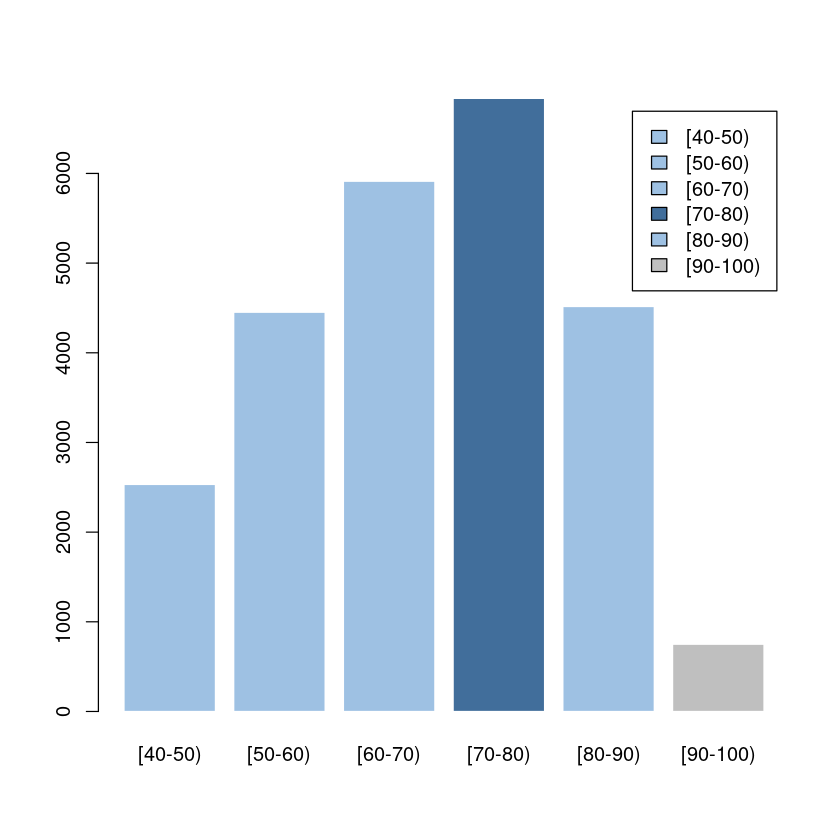

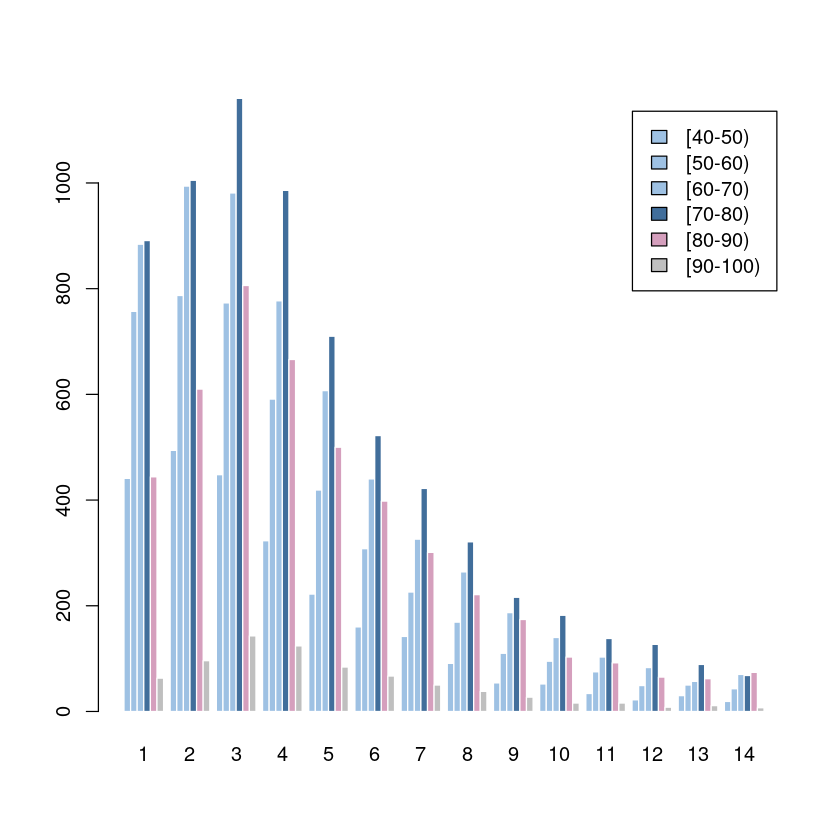

In [3]:


# Plot for age
counts = table(readmissions$age)
barplot(counts, border=F, col=c("#9EC1E3", "#9EC1E3", "#9EC1E3", "#416E9B", "#9EC1E3", "#BFBFBF"),
  legend = rownames(counts), beside=TRUE)

# Plot for relationship between categorical variables "age" and "time_in_hospital"
counts <- table(readmissions$age, readmissions$time_in_hospital)
barplot(counts, border=F, col=c("#9EC1E3", "#9EC1E3", "#9EC1E3", "#416E9B", "#D59FBD", "#BFBFBF"), 
 legend = rownames(counts), beside= TRUE)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


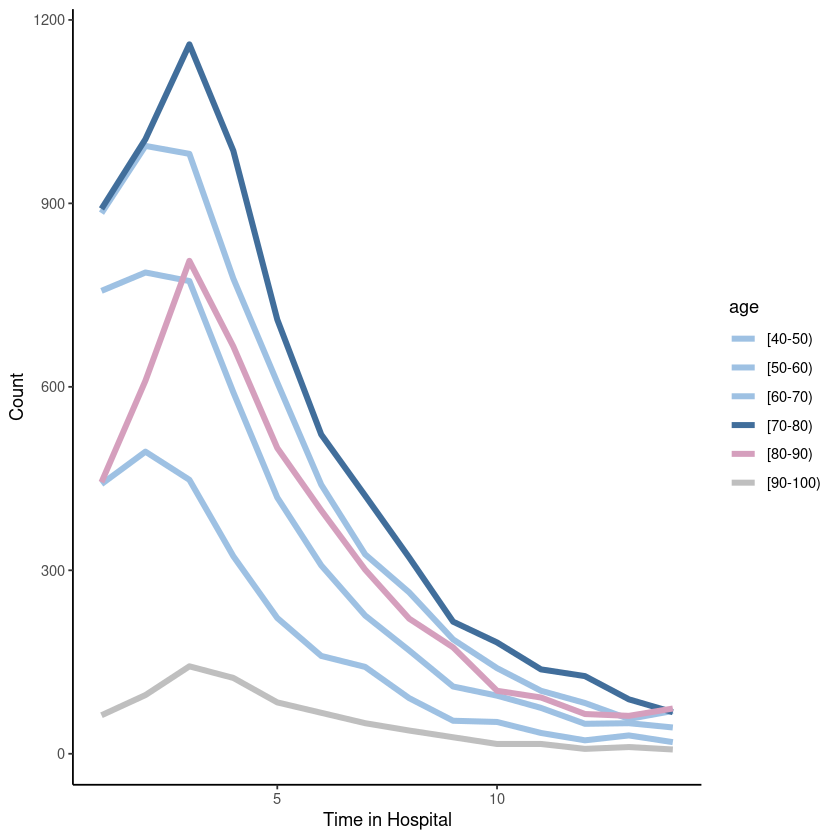

In [4]:
# Transform the data into a long format
data_long <- data.frame(age = rep(rownames(counts), ncol(counts)),
                        time_in_hospital = rep(colnames(counts), each = nrow(counts)),
                        count = as.vector(counts)) %>%
              mutate(time_in_hospital = as.numeric(time_in_hospital))

# Plot the data
ggplot(data_long, aes(x = time_in_hospital, y = count, color = age)) +
  geom_line(size = 1.7) +
  labs(x = "Time in Hospital", y = "Count") +
  scale_color_manual(values = c("#9EC1E3", "#9EC1E3", "#9EC1E3", "#416E9B", "#D59FBD", "#BFBFBF")) +
  theme_classic()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   4.453   6.000  14.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   1.352   2.000   6.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   31.00   44.00   43.24   57.00  113.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   11.00   15.00   16.25   20.00   79.00 

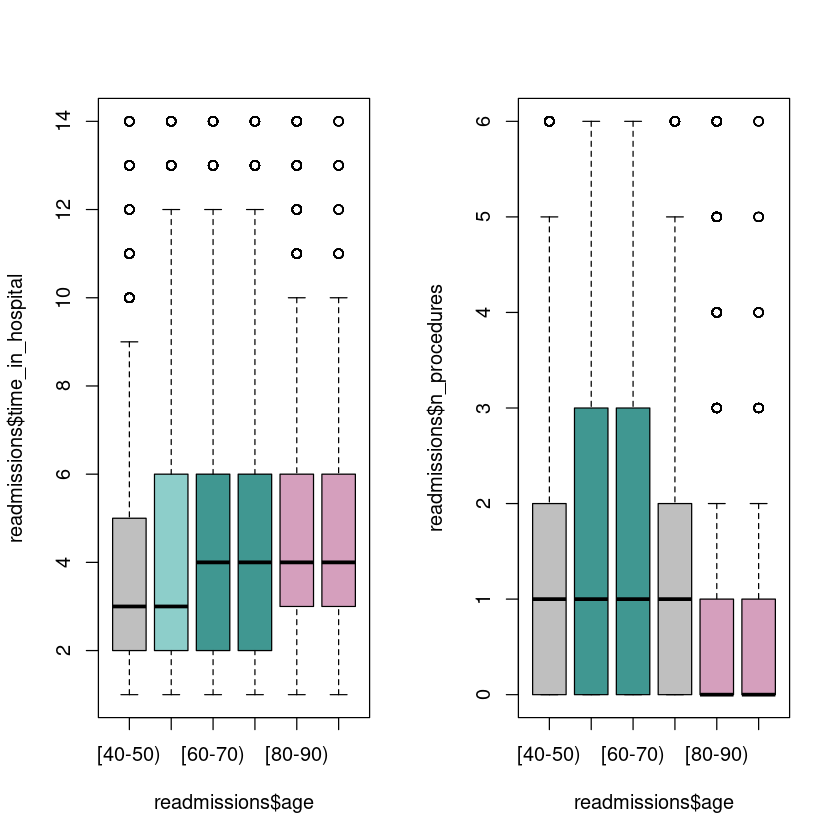

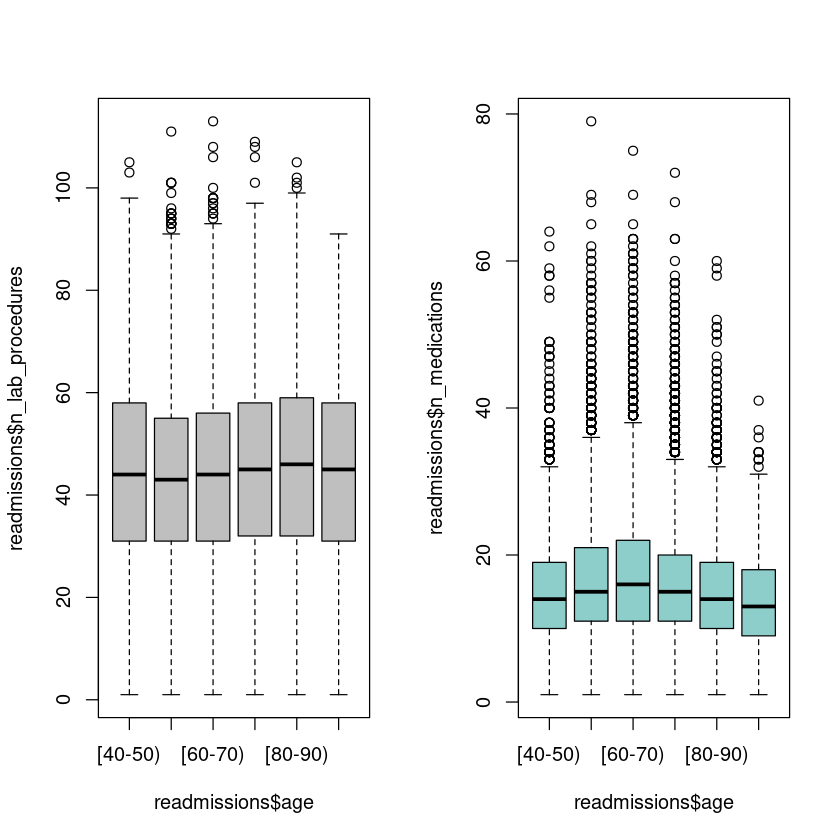

In [5]:
par(mfrow=c(1,2))

summary(readmissions$time_in_hospital)
boundaries <- boxplot(readmissions$time_in_hospital ~ readmissions$age, col=c("#BFBFBF","#8DCECA","#409791","#409791","#D59FBD","#D59FBD"), beside=TRUE)

summary(readmissions$n_procedures)
boundaries <- boxplot(readmissions$n_procedures ~ readmissions$age, col=c("#BFBFBF","#409791","#409791","#BFBFBF","#D59FBD","#D59FBD"), beside=TRUE)


summary(readmissions$n_lab_procedures)
boundaries <- boxplot(readmissions$n_lab_procedures ~ readmissions$age, col=c("#BFBFBF","#BFBFBF","#BFBFBF","#BFBFBF","#BFBFBF","#BFBFBF"), beside=TRUE)

summary(readmissions$n_medications)
boundaries <- boxplot(readmissions$n_medications ~ readmissions$age, col=c("#8DCECA","#8DCECA","#8DCECA","#8DCECA","#8DCECA","#8DCECA"), beside=TRUE)


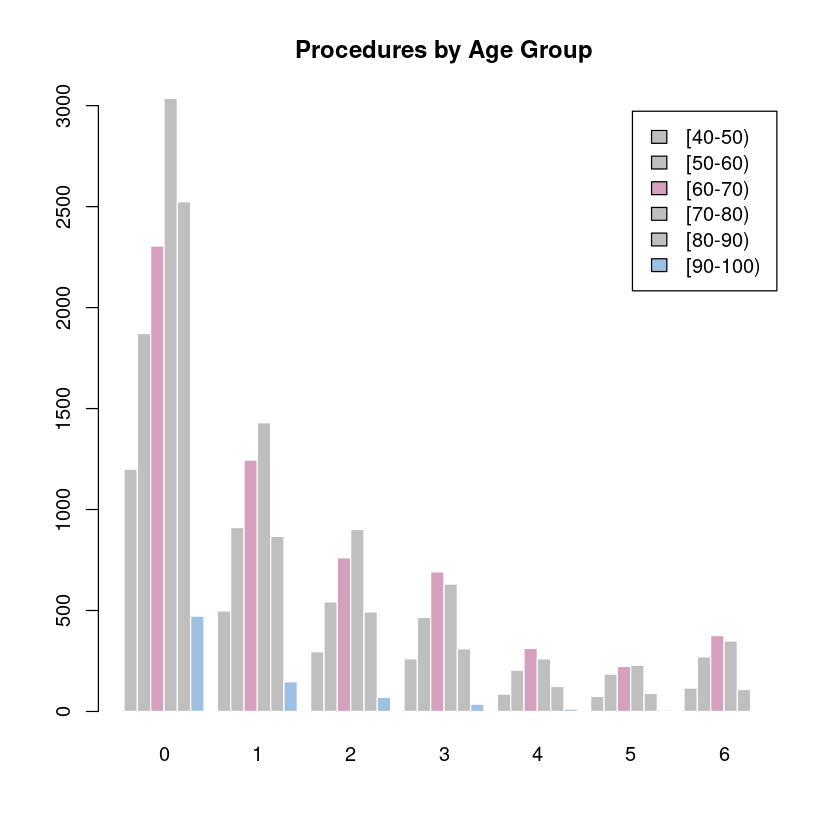

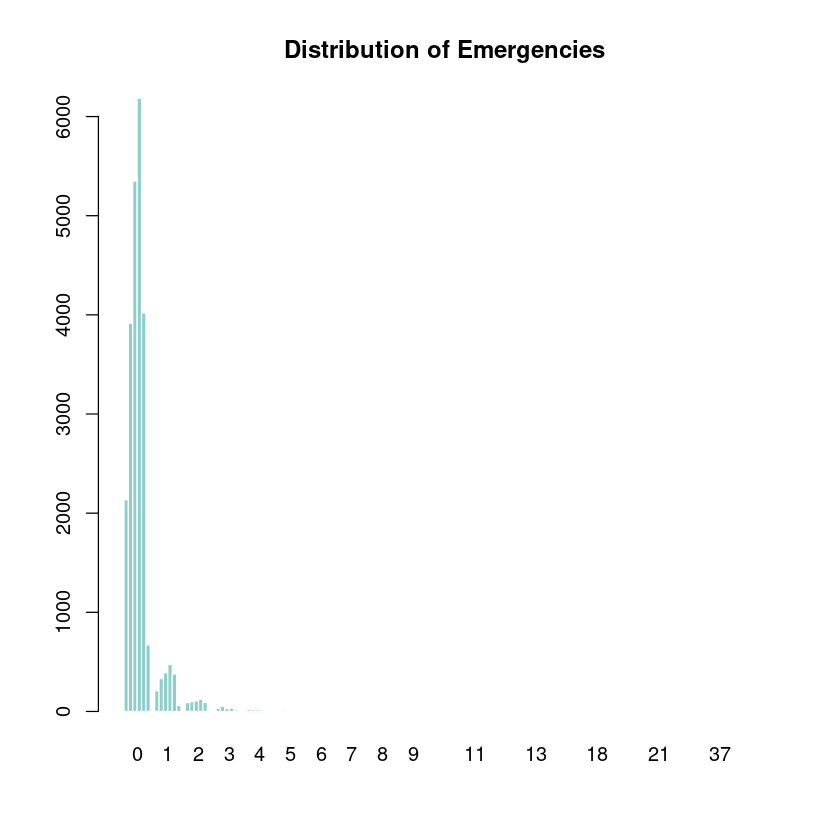

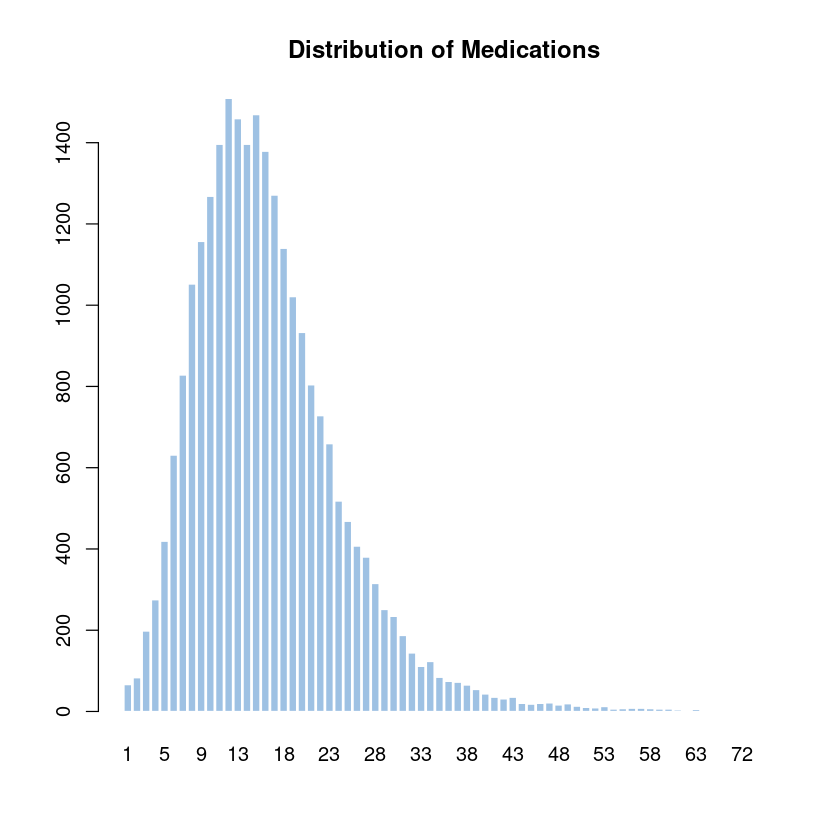

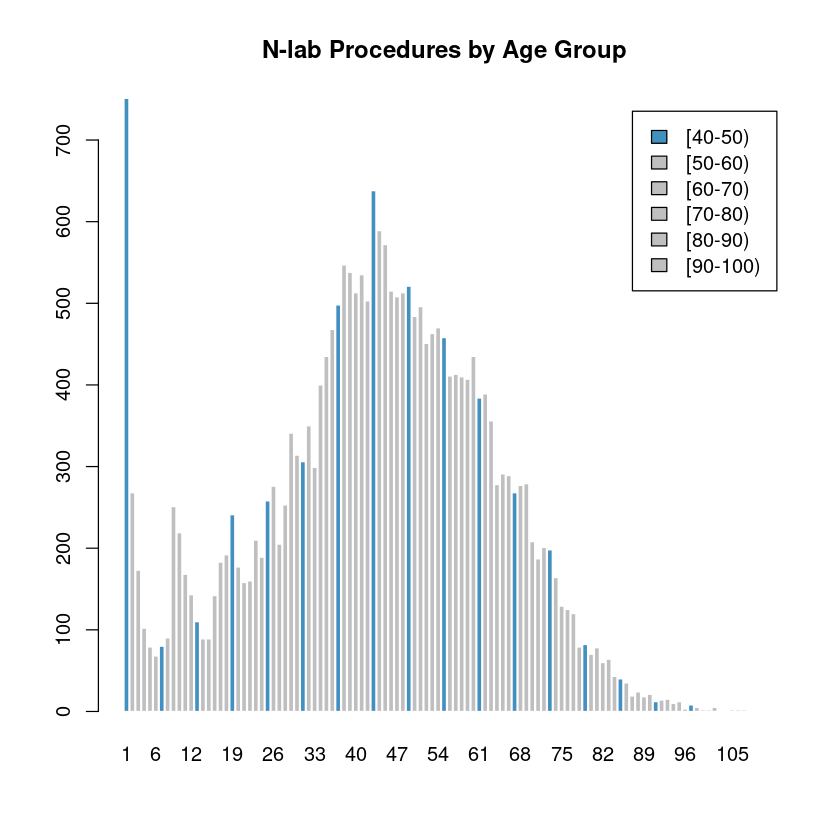

In [6]:
counts <- table(readmissions$age, readmissions$n_procedures)
barplot(counts, border=F, main="Procedures by Age Group",
   col=c("#BFBFBF","#BFBFBF","#D59FBD","#BFBFBF","#BFBFBF","#9EC1E3"),
  legend = rownames(counts), beside=TRUE)

counts <- table(readmissions$age, readmissions$n_emergency)
barplot(counts,border=F, main="Distribution of Emergencies",
   col=c("#8DCECA"),beside=TRUE)

barplot(table(readmissions$n_medications),border=F, main="Distribution of Medications",
   col=c("#9EC1E3","#9EC1E3","#9EC1E3","#9EC1E3","#9EC1E3","#9EC1E3"))

barplot(table(readmissions$n_lab_procedures), border=F, main="N-lab Procedures by Age Group",
   col=c("#4290C0","#BFBFBF","#BFBFBF","#BFBFBF","#BFBFBF","#BFBFBF"),
  legend = rownames(counts), beside=TRUE)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




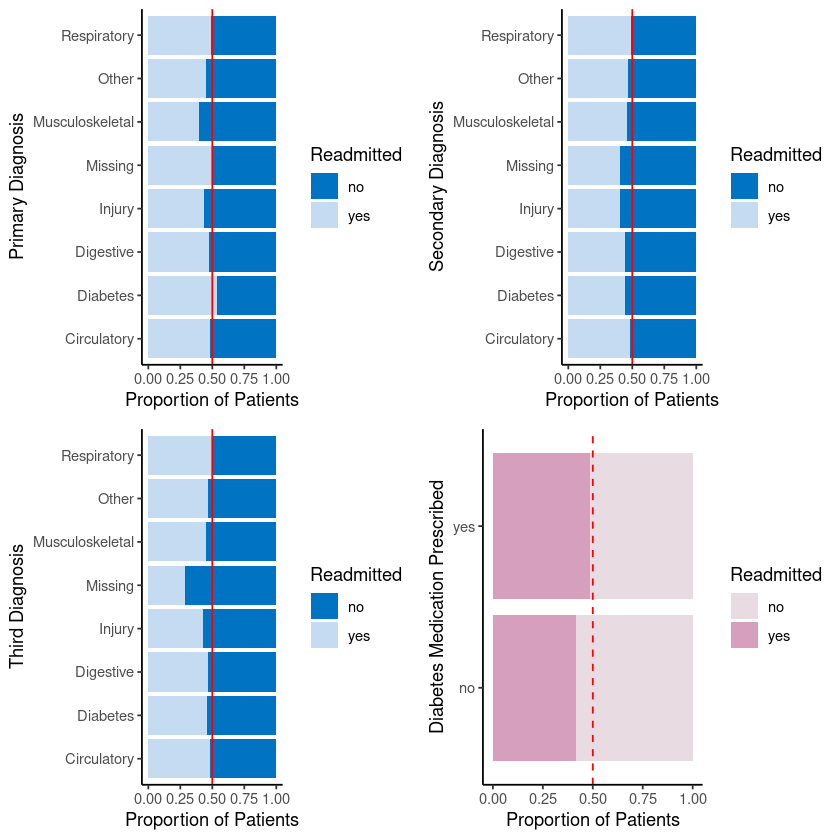

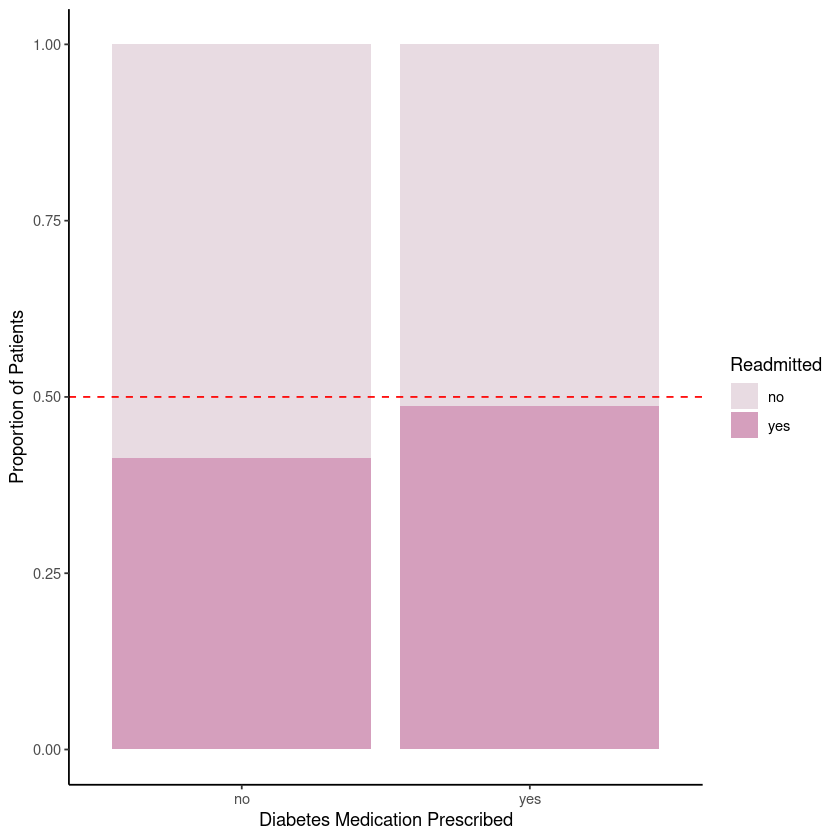

In [7]:
library(gridExtra)

# Store the ggplots in a list
plots <- list(
  ggplot(readmissions, aes(x = diag_1, fill = factor(readmitted) )) +
    geom_bar(position = "fill") +
    scale_fill_manual(values = c("#0073C2FF", "#C5DBF2")) +
    labs(x = "Primary Diagnosis", y = "Proportion of Patients", fill = "Readmitted") +
    theme_classic() +
    coord_flip() +
    geom_hline(yintercept = 0.5, color = "red"),
  ggplot(readmissions, aes(x = diag_2, fill = factor(readmitted) )) +
    geom_bar(position = "fill") +
    scale_fill_manual(values = c("#0073C2FF", "#C5DBF2")) +
    labs(x = "Secondary Diagnosis", y = "Proportion of Patients", fill = "Readmitted") +
    theme_classic() +
    coord_flip()+
    geom_hline(yintercept = 0.5, color = "red"),
  ggplot(readmissions, aes(x = diag_3, fill = factor(readmitted) )) +
    geom_bar(position = "fill") +
    scale_fill_manual(values = c("#0073C2FF", "#C5DBF2")) +
    labs(x = "Third Diagnosis", y = "Proportion of Patients", fill = "Readmitted") +
    theme_classic() +
    coord_flip()+
    geom_hline(yintercept = 0.5, color = "red"),
  ggplot(readmissions, aes(x = diabetes_med, fill = factor(readmitted) )) +
    geom_bar(position = "fill") +
    scale_fill_manual(values = c("#E8DBE2","#D59FBD")) +
    labs(x = "Diabetes Medication Prescribed", y = "Proportion of Patients", fill = "Readmitted") +
    theme_classic() +
    coord_flip() +
    geom_hline(yintercept = 0.5, color = "red", linetype = "dashed")
)

# Display the plots side by side
grid.arrange(grobs=plots, ncol=2)

  ggplot(readmissions, aes(x = diabetes_med, fill = factor(readmitted) )) +
    geom_bar(position = "fill") +
    scale_fill_manual(values = c("#E8DBE2","#D59FBD")) +
    labs(x = "Diabetes Medication Prescribed", y = "Proportion of Patients", fill = "Readmitted") +
    theme_classic() +
    geom_hline(yintercept = 0.5, color = "red", linetype = "dashed")

we can see diabetes has quite the effect of patient readmission. It is worth exploring more. 

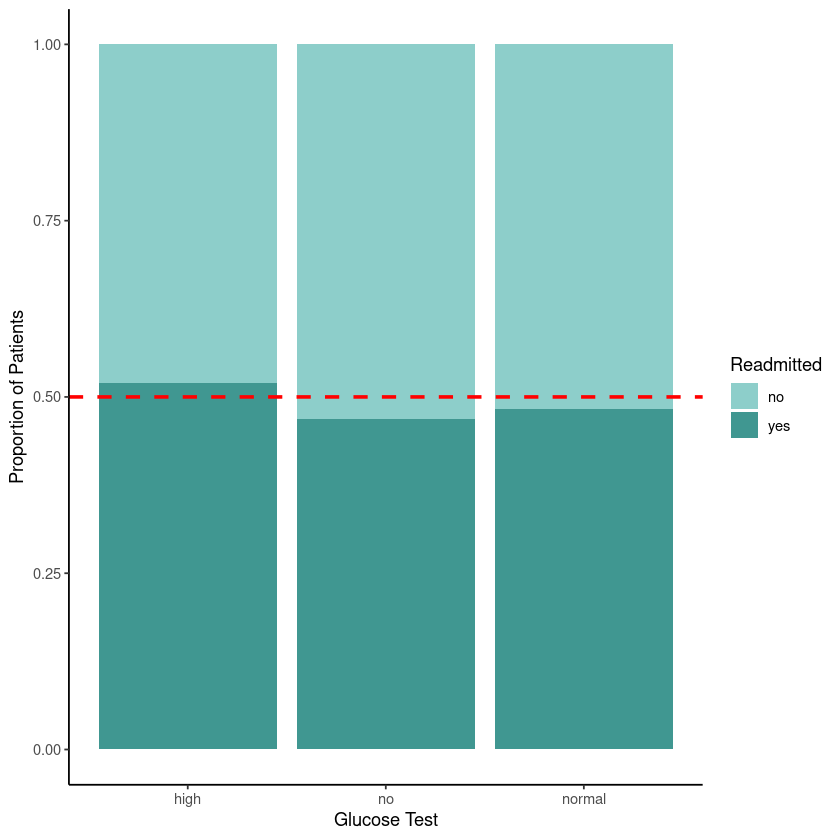

In [8]:
  ggplot(readmissions, aes(x = glucose_test, fill = factor(readmitted) )) +
    geom_bar(position = "fill") +
    scale_fill_manual(values = c("#8DCECA","#409791")) +
    labs(x = "Glucose Test", y = "Proportion of Patients", fill = "Readmitted") +
    #ggtitle("Diagnosis vs Readmission") +
    theme_classic() +
    geom_hline(yintercept = 0.5, color = "red", linetype = "dashed", size = 1) 

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message in ggcorr(readmissions, method = c("everything", "pearson"), label = TRUE, :
“data in column(s) 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted' are not numeric and were ignored”


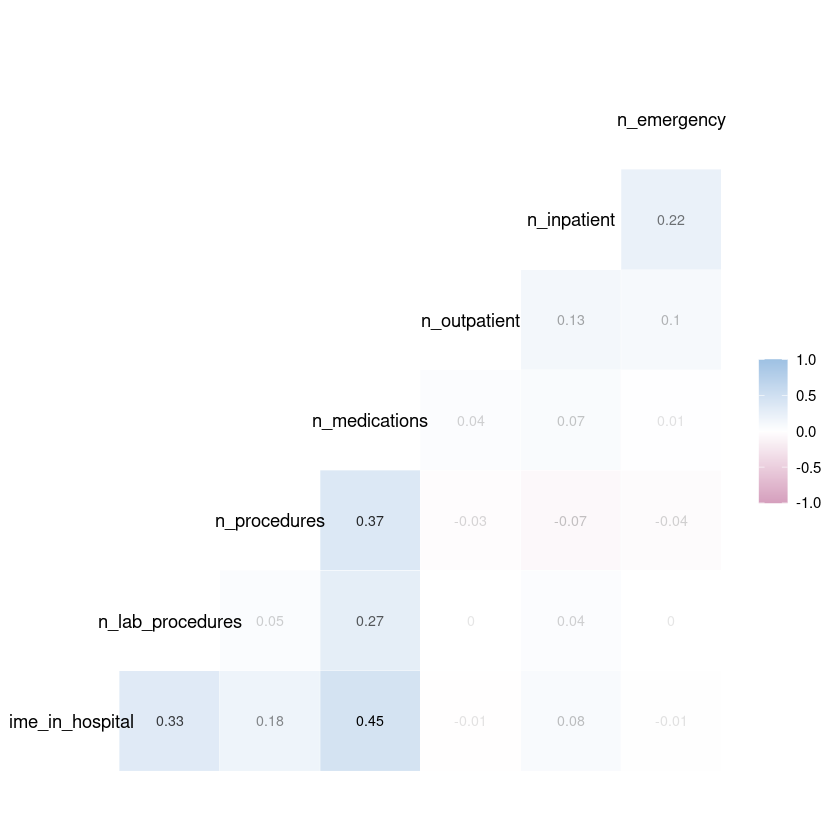

In [9]:
# Quick display of two cabapilities of GGally, to assess the distribution and correlation of variables 
library(GGally)
 
#visualization of correlations
ggcorr(readmissions, method = c("everything", "pearson"),label = TRUE, label_size = 3, label_round = 2, label_alpha = TRUE, low = "#D59FBD", mid = "white", high = "#9EC1E3")

In [10]:
library(vcd)
glucose_test <- readmissions$glucose_test
A1Ctest <- readmissions$A1Ctest
change <- readmissions$change
diabetes_med <- readmissions$diabetes_med
readmitted <- readmissions$readmitted

contingency_table1 <- table(glucose_test, A1Ctest)
contingency_table2 <- table(change, diabetes_med)
contingency_table3 <- table(readmitted, diabetes_med)

cramer1 <- assocstats(contingency_table1)$cramer
cramer2 <- assocstats(contingency_table2)$cramer
cramer3 <- assocstats(contingency_table3)$cramer

paste("Cramer's V for glucose_test and A1Ctest:", cramer1)
paste("Cramer's V for change and diabetes_med:", cramer2)
paste("Cramer's V for readmitted and diabetes_med:", cramer3)

[1] "Cramer's V for glucose_test and A1Ctest: 0.0523948151972929"

[1] "Cramer's V for change and diabetes_med: 0.505804909510624"

[1] "Cramer's V for readmitted and diabetes_med: 0.0621452784052797"

In [11]:
# group data by the "age" column
spider <- readmissions %>% group_by(age) %>% summarize(
    # summarize the grouped data by calculating the sum of columns
    tot_time_in_hospital =sum(time_in_hospital),
    tot_lab_procedures = sum(n_lab_procedures),
    tot_procedures =  sum(n_procedures),
    tot_medications = sum(n_medications),
    tot_outpatient = sum(n_outpatient),
    tot_inpatient = sum(n_inpatient),
    tot_emergency = sum(n_emergency)
)
spider


age,tot_time_in_hospital,tot_lab_procedures,tot_procedures,tot_medications,tot_outpatient,tot_inpatient,tot_emergency
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
[40-50),10157,108763,3288,38781,765,1825,1002
[50-60),18496,189164,6762,74346,1456,2724,1022
[60-70),25925,251877,9459,101840,2222,3592,948
[70-80),31444,297951,9408,111863,2711,4110,924
[80-90),21739,200283,4378,69075,1810,2730,665
[90-100),3572,32981,514,10405,196,418,104


Perform a calculation to determine the proportion or percentage of patients in each age group visiting the hospital. This process is commonly referred to as normalizing the data by calculating relative frequencies or proportions (I think)

In [12]:
# remove "age" column 
spider1 <- spider %>% select(-age)
# group data by "age" column and count observations for each group
patient_count <- readmissions %>% group_by(age) %>% summarize(count = n())
# divide "spider1" data frame by the corresponding count in the "patient_count$count"
average_per_patient <- spider1/patient_count$count #the average of each summarized value per patient for each age group.

#add age brackets as rownames
rownames(average_per_patient) <- c("[40-50)","[50-60)","[60-70)", "[70-80)","[80-90)","[90-100)")
#calculates the maximum value for each column 
max <- apply(average_per_patient, 2, max)
#calculates the miimum value for each column 
min <- apply(average_per_patient, 2, min)
# bind all data
average_per_patient1 <- rbind(max,min,average_per_patient)

# data frame for spider chart
average_per_patient1

,tot_time_in_hospital,tot_lab_procedures,tot_procedures,tot_medications,tot_outpatient,tot_inpatient,tot_emergency
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.813773,44.34965,1.5996956,17.22307,0.4007972,0.7207741,0.3957346
2,4.011453,42.48967,0.6853333,13.87333,0.2613333,0.5573333,0.1351470
[40-50),4.011453,42.95537,1.2985782,15.31635,0.3021327,0.7207741,0.3957346
[50-60),4.154537,42.48967,1.5188679,16.69946,0.3270440,0.6118598,0.2295597
[60-70),4.384407,42.59716,1.5996956,17.22307,0.3757822,0.6074751,0.1603247
[70-80),4.599093,43.57920,1.3760421,16.36142,0.3965189,0.6011409,0.1351470
[80-90),4.813773,44.34965,0.9694420,15.29562,0.4007972,0.6045173,0.1472542
[90-100),4.762667,43.97467,0.6853333,13.87333,0.2613333,0.5573333,0.1386667


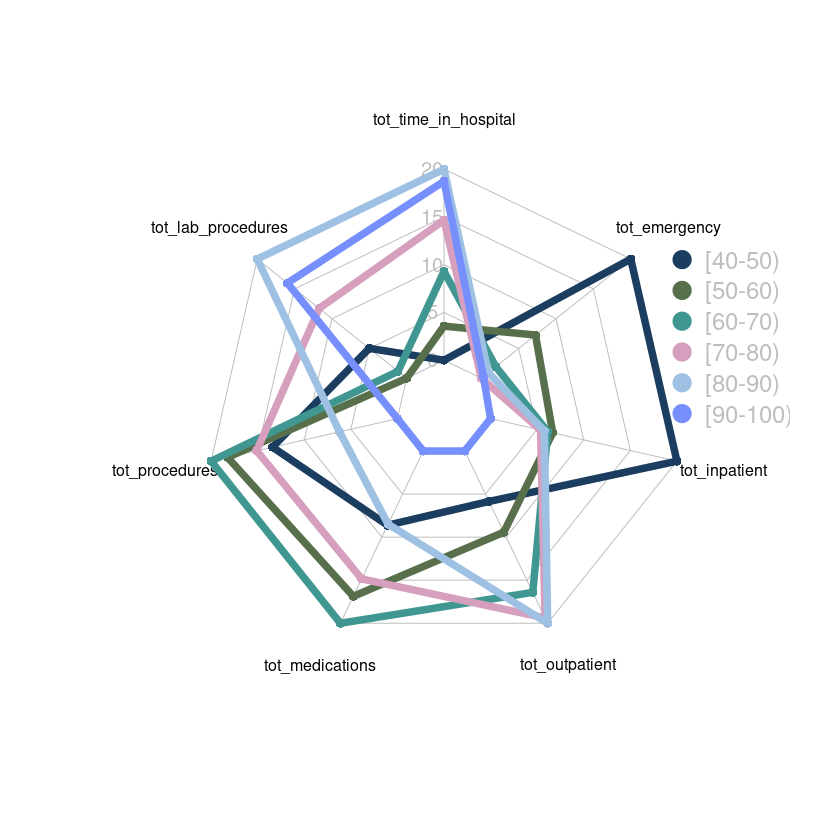

In [13]:
colors_border = c(
  "#1B3D5F", "#576F4A", "#409791", "#D59FBD", "#9EC1E3", "#768FFD"
)

# plot with default options:
radarchart(average_per_patient1, axistype=1,
  # custom polygon
  pcol = colors_border, plwd = 6, plty = 1,
  # custom the grid
  cglcol = "grey", cglty = 1, axislabcol = "grey", caxislabels = seq(0,20,5), cglwd = 0.8,
  # custom labels
  vlcex = 0.8
)

# this legend shows which color coresponds to which age brackets
legend(x = 0.90, y = 0.75, legend = rownames(average_per_patient1[-c(1,2),]), bty = "n", pch = 20, 
       col = colors_border, text.col = "grey", cex = 1.2, pt.cex = 3)

Warning message in ggcorr(age_40_50, method = c("everything", "pearson"), label = TRUE, :
“data in column(s) 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted' are not numeric and were ignored”
Warning message in ggcorr(age_50_60, method = c("everything", "pearson"), label = TRUE, :
“data in column(s) 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted' are not numeric and were ignored”


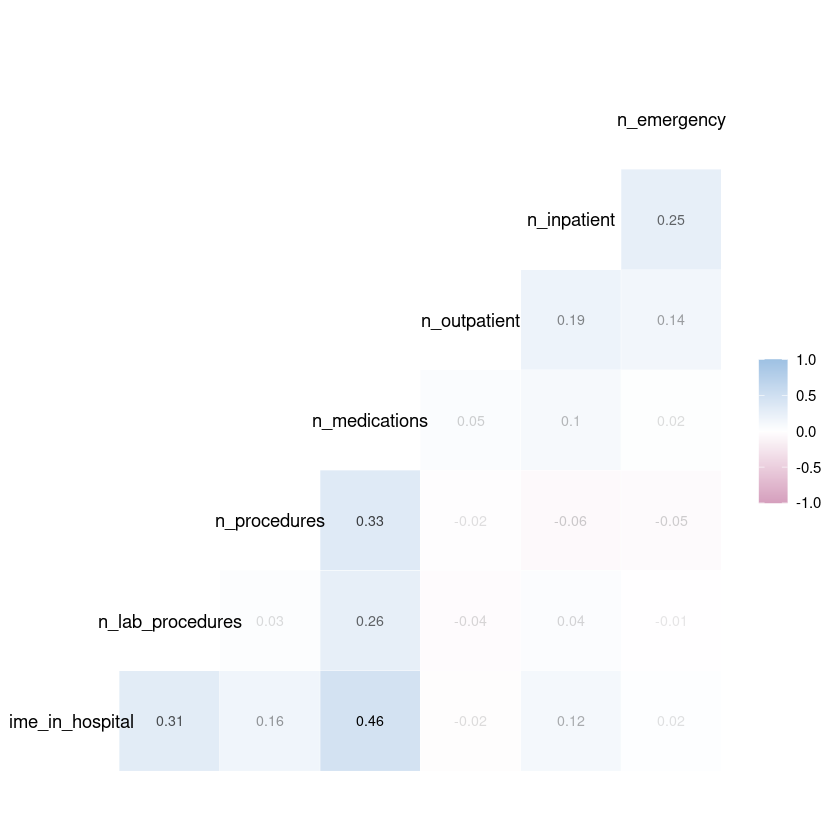

Warning message in ggcorr(age_70_80, method = c("everything", "pearson"), label = TRUE, :
“data in column(s) 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted' are not numeric and were ignored”


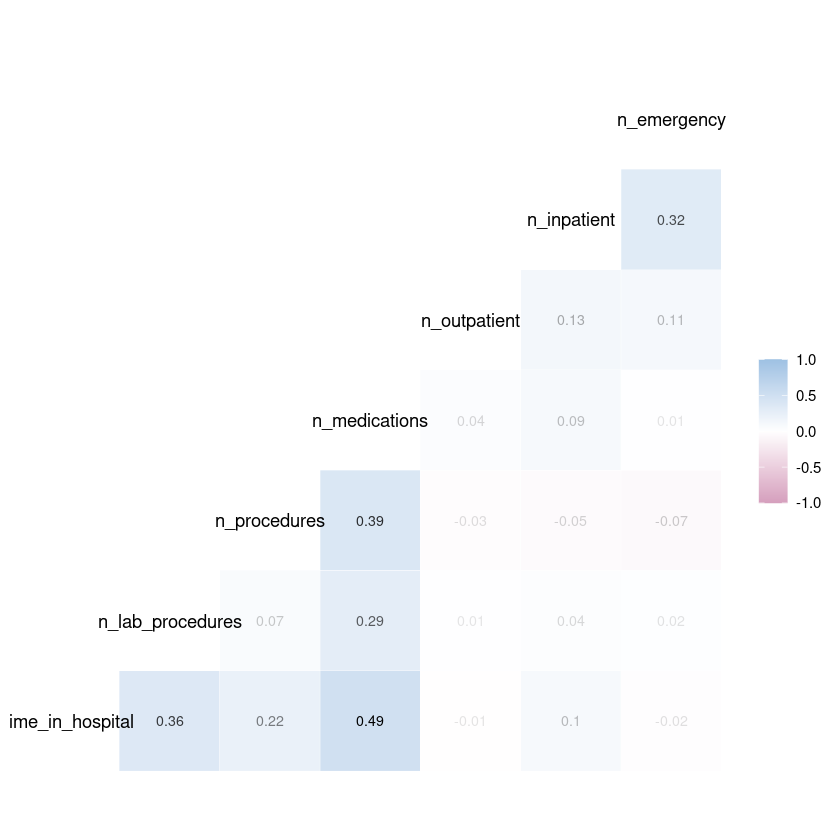

Warning message in ggcorr(age90_100, method = c("everything", "pearson"), label = TRUE, :
“data in column(s) 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted' are not numeric and were ignored”


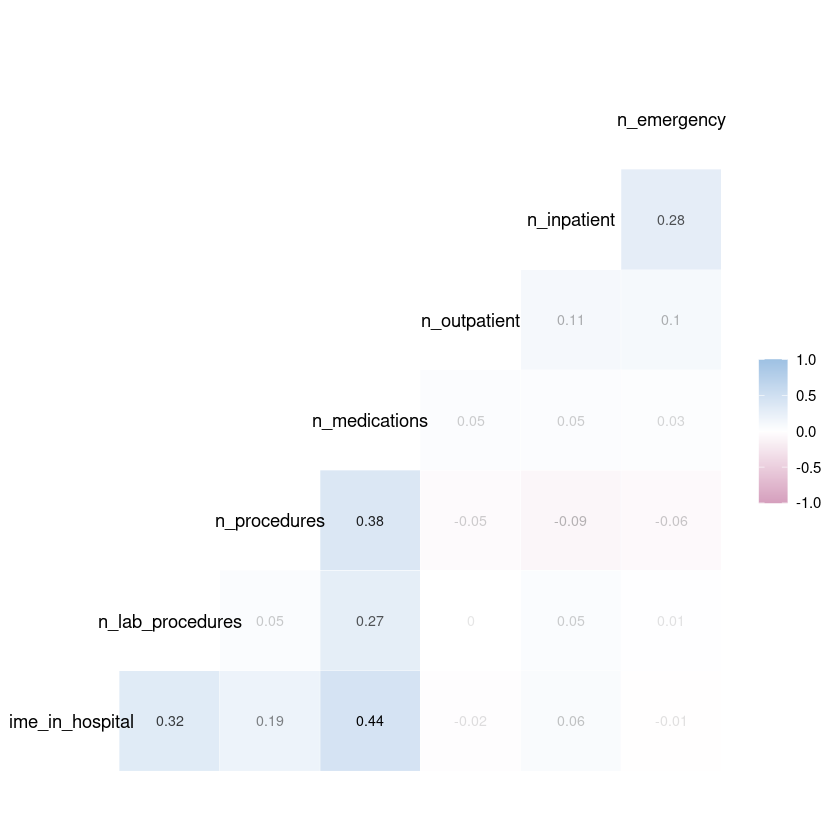

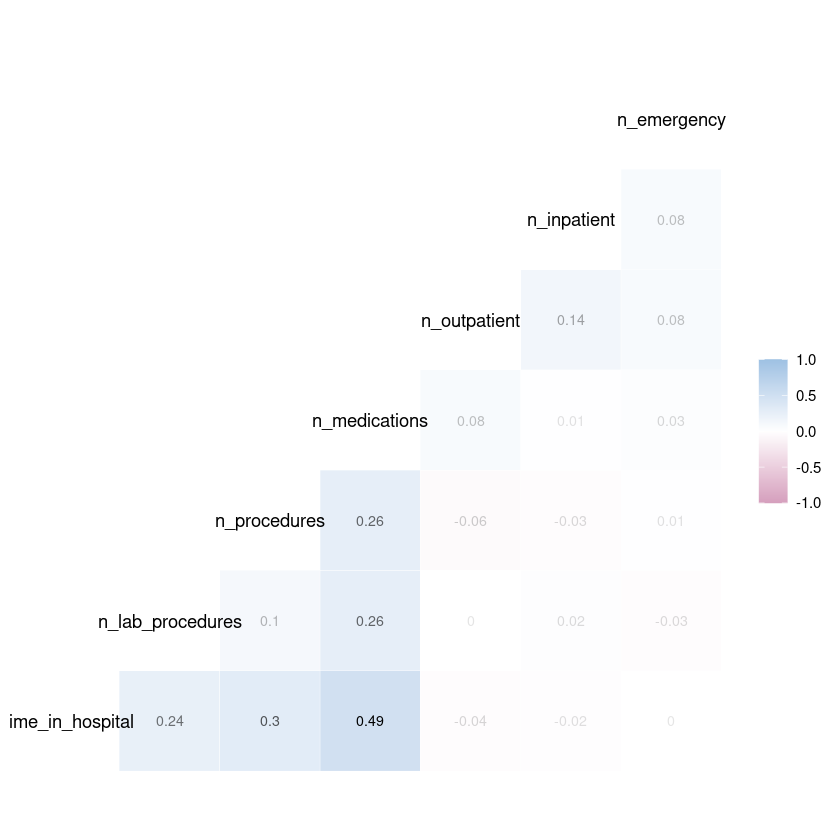

In [14]:
#trying to find interesting patterns and correlations for some of the age groups
age_40_50 <- readmissions %>% filter(age == "[40-50)")
age_50_60 <- readmissions %>% filter(age == "[50-60)")
age_70_80 <- readmissions %>% filter(age == "[70-80)")
age90_100 <- readmissions %>% filter(age == "[90-100)")

#visualization of correlations
ggcorr(age_40_50, method = c("everything", "pearson"),label = TRUE, label_size = 3, label_round = 2, label_alpha = TRUE, low = "#D59FBD", mid = "white", high = "#9EC1E3")

ggcorr(age_50_60, method = c("everything", "pearson"),label = TRUE, label_size = 3, label_round = 2, label_alpha = TRUE, low = "#D59FBD", mid = "white", high = "#9EC1E3")

ggcorr(age_70_80, method = c("everything", "pearson"),label = TRUE, label_size = 3, label_round = 2, label_alpha = TRUE, low = "#D59FBD", mid = "white", high = "#9EC1E3")

ggcorr(age90_100, method = c("everything", "pearson"),label = TRUE, label_size = 3, label_round = 2, label_alpha = TRUE, low = "#D59FBD", mid = "white", high = "#9EC1E3")

In [15]:
diag <- readmissions %>% group_by(age) %>% 
	summarize(
    most_common_diagnosis = names( # return the name of the diagnosis 
        which.max( # return the position of the maximum count.
            table(diag_1)))) # create a table that counts the number of observations for each unique value of "diag_1".


diag %>% arrange(desc(age))

diagnosis <- readmissions %>% group_by(age,diag_1) %>% 
count(diag_1) 

diagnosis 


age,most_common_diagnosis
<chr>,<chr>
[90-100),Circulatory
[80-90),Circulatory
[70-80),Circulatory
[60-70),Circulatory
[50-60),Circulatory
[40-50),Other


New names:
• `` -> `...1`


age,diag_1,n
<chr>,<chr>,<int>
[40-50),Circulatory,504
[40-50),Diabetes,369
[40-50),Digestive,271
[40-50),Injury,162
[40-50),Musculoskeletal,100
[40-50),Other,750
[40-50),Respiratory,376
[50-60),Circulatory,1256
[50-60),Diabetes,393


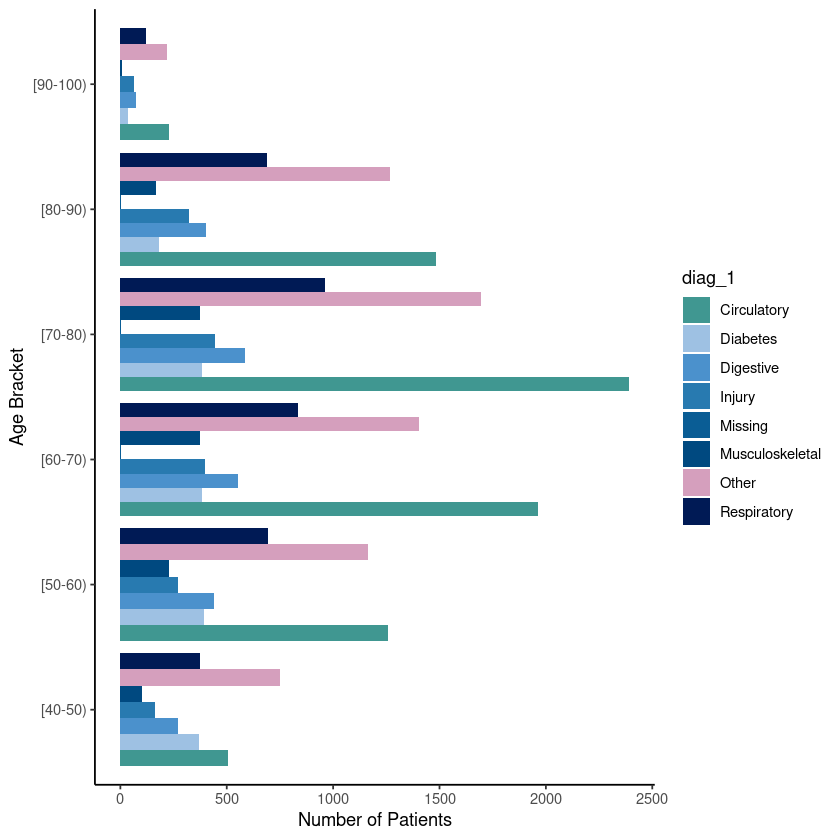

In [16]:
# Create the ggplot object
ggplot(diagnosis, aes(x = age, y = n, fill = diag_1)) +
  
  # Add the bars to the plot
  geom_bar(stat = "identity", position = "dodge") +
  
  # Add x-axis and y-axis labels
  xlab("Age Bracket") +
  ylab("Number of Patients") +
  coord_flip() +
  theme_classic() +
  scale_fill_manual(values = c("#409791" ,"#9EC1E3", "#4B91CC", "#287AB0", "#0A5D95", "#004980", "#D59FBD", "#001A55")) 


In [17]:
# First, create a contingency table
table <- table(readmissions$diabetes_med, readmissions$readmitted)
table
# Perform the chi-squared test
chisq.test(table)

     
        no  yes
  no  3385 2387
  yes 9861 9367


	Pearson's Chi-squared test with Yates' continuity correction

data:  table
X-squared = 96.256, df = 1, p-value < 2.2e-16


#### Random Forest Model for predicting Patient Readmission

Selecting a modeling approach:
- An appropriate modeling approach to predict readmission probability would include logistic regression, decision trees, random forests, or other machine learning algorithms such as gradient boosting. 
- A Random forest model was picked for this problem. It is a powerful and versatile algorithm that can be used for a wide range of tasks, including classification, regression, and feature selection. It is known for its high accuracy and robustness to noise and outliers. The process is as follows:

In [18]:
install.packages("randomForest")
install.packages("Metrics")
library(Metrics)
install.packages("vip")
library(vip)
library(rsample)      # data splitting 
library(randomForest) # basic implementation
library(ranger)       # a faster implementation of randomForest
library(caret)        # an aggregator package for performing many machine learning models     

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/randomForest_4.7-1.1.tar.gz' ...
	OK [downloaded 256.8 Kb in 0.1 secs]
Installing randomForest [4.7-1.1] ...
	OK [installed binary]
Moving randomForest [4.7-1.1] into the cache ...
	OK [moved to cache in 0.27 milliseconds]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/Metrics_0.1.4.tar.gz' ...
	OK [downloaded 75.4 Kb in 0.4 secs]
Installing Metrics [0.1.4] ...
	OK [installed binary]
Moving Metrics [0.1.4] into the cache ...
	OK [moved to cache in 0.29 milliseconds]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/vip_0.3.2.tar.gz' ...
	OK [downloaded 2.6 Mb in 0.5 secs]
Installing vip [0.3.2] ...
	OK [installed binary]
Moving vip [0.3.2] into the cache ...
	OK [moved to cache in 0.43 milliseconds]



Attaching package: ‘vip’


The following object is masked from ‘package:utils’:

    vi


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘ranger’


The following object is masked from ‘package:randomForest’:

    importance


Loading required package: lattice

Registered S3 methods overwritten by 'pROC':
  method    from
  print.roc fmsb
  plot.roc  fmsb


Attaching package: ‘caret’


The following objects are masked from ‘package:Metrics’:

    precision, recall


The following object is masked from ‘package:purrr’:

    lift




### 1. Data preprocessing
First, we need to preprocess the data by handling missing values, converting data types and scaling or normalizing the numerical variables.

In [19]:
# Convert char variables to factors
readmissions$age <- as.factor(readmissions$age)
readmissions$medical_specialty <- as.factor(readmissions$medical_specialty)
readmissions$diag_1 <- as.factor(readmissions$diag_1)
readmissions$diag_2 <- as.factor(readmissions$diag_2)
readmissions$diag_3 <- as.factor(readmissions$diag_3)
readmissions$glucose_test <- as.factor(readmissions$glucose_test)
readmissions$A1Ctest <- as.factor(readmissions$A1Ctest)
readmissions$change <- as.factor(as.numeric(readmissions$change == "yes"))
readmissions$diabetes_med <- as.factor(as.numeric(readmissions$diabetes_med == "yes"))
readmissions$readmitted <- as.factor(as.numeric(readmissions$readmitted == "yes"))
str(readmissions)

unique(readmissions$diag_1)

spc_tbl_ [25,000 × 17] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age              : Factor w/ 6 levels "[40-50)","[50-60)",..: 4 4 2 4 3 1 2 3 5 4 ...
 $ time_in_hospital : num [1:25000] 8 3 5 2 1 2 4 1 4 8 ...
 $ n_lab_procedures : num [1:25000] 72 34 45 36 42 51 44 19 67 37 ...
 $ n_procedures     : num [1:25000] 1 2 0 0 0 0 2 6 3 1 ...
 $ n_medications    : num [1:25000] 18 13 18 12 7 10 21 16 13 18 ...
 $ n_outpatient     : num [1:25000] 2 0 0 1 0 0 0 0 0 0 ...
 $ n_inpatient      : num [1:25000] 0 0 0 0 0 0 0 0 0 0 ...
 $ n_emergency      : num [1:25000] 0 0 0 0 0 0 0 1 0 0 ...
 $ medical_specialty: Factor w/ 7 levels "Cardiology","Emergency/Trauma",..: 5 6 5 5 4 5 5 6 4 3 ...
 $ diag_1           : Factor w/ 8 levels "Circulatory",..: 1 7 1 1 7 7 4 1 3 8 ...
 $ diag_2           : Factor w/ 8 levels "Circulatory",..: 8 7 1 7 1 7 7 7 7 8 ...
 $ diag_3           : Factor w/ 8 levels "Circulatory",..: 7 7 1 2 8 7 7 7 7 7 ...
 $ glucose_test     : Factor w/ 3 levels "high","no","norma

[1] Circulatory     Other           Injury          Digestive      
[5] Respiratory     Diabetes        Musculoskeletal Missing        
8 Levels: Circulatory Diabetes Digestive Injury Missing ... Respiratory

In [20]:
# remove 'secondary' data that might heavily impact random forest accuracy. 
clean_data = readmissions %>%
  janitor::clean_names()  # powerful method that automates cleaning process
# remove age cause we wanna focus on which age group later., medical specialty wont help us, diag2-3 might afffect the models performance., might not. we must see.

head(clean_data)

age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,a1ctest,change,diabetes_med,readmitted
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,0,1,0
[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,0,1,0
[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,1,1,1
[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,1,1,1
[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,0,1,0
[40-50),2,51,0,10,0,0,0,Missing,Other,Other,Other,no,no,0,0,1


Loading required package: reshape2


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Using age, medical_specialty, diag_1, diag_2, diag_3, glucose_test, a1ctest, change, diabetes_med, readmitted as id variables



,age,medical_specialty,diag_1,diag_2,diag_3,glucose_test,a1ctest,change,diabetes_med,readmitted,variable,value
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,[70-80),Missing,Circulatory,Respiratory,Other,no,no,0,1,0,time_in_hospital,8
2,[70-80),Other,Other,Other,Other,no,no,0,1,0,time_in_hospital,3
3,[50-60),Missing,Circulatory,Circulatory,Circulatory,no,no,1,1,1,time_in_hospital,5
4,[70-80),Missing,Circulatory,Other,Diabetes,no,no,1,1,1,time_in_hospital,2
5,[60-70),InternalMedicine,Other,Circulatory,Respiratory,no,no,0,1,0,time_in_hospital,1
6,[40-50),Missing,Other,Other,Other,no,no,0,0,1,time_in_hospital,2


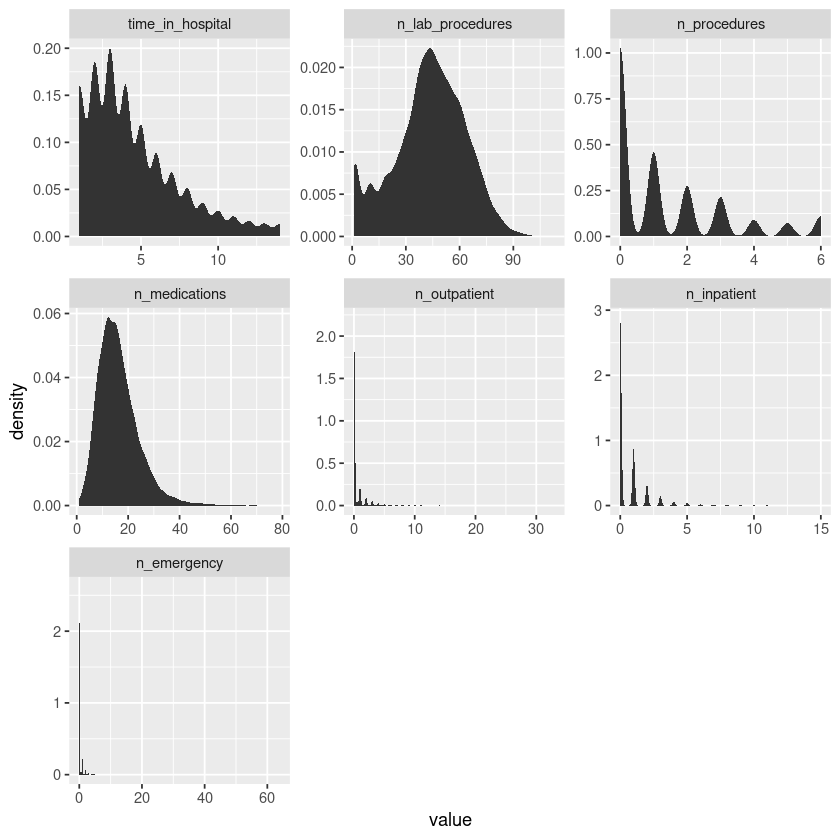

In [21]:
require(reshape2)

#Convert wide to long
melt_data <- melt(clean_data)

head(melt_data)

ggplot( melt_data, aes(x = value)) + 
stat_density() + 
facet_wrap(~variable, scales = "free")

Due to the Imbalance in the data, a first attempt was to create synthetic samples of the minority class using a technique called Synthetic Minority Over-sampling Technique (SMOTE). 

In [22]:
#new_data <- upSample(data, data$readmitted)
upSample_data <- upSample(clean_data[,-17], clean_data$readmitted, yname="Readmitted")
str(upSample_data)

upSample_data %>% count(Readmitted)


upSample_data %>% count(age)

'data.frame':	26492 obs. of  17 variables:
 $ age              : Factor w/ 6 levels "[40-50)","[50-60)",..: 4 4 3 2 4 4 2 4 5 5 ...
 $ time_in_hospital : num  8 3 1 4 8 1 4 8 3 2 ...
 $ n_lab_procedures : num  72 34 42 44 37 35 69 67 60 73 ...
 $ n_procedures     : num  1 2 0 2 1 0 0 0 0 1 ...
 $ n_medications    : num  18 13 7 21 18 7 6 21 18 26 ...
 $ n_outpatient     : num  2 0 0 0 0 0 0 0 0 0 ...
 $ n_inpatient      : num  0 0 0 0 0 0 0 0 2 0 ...
 $ n_emergency      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ medical_specialty: Factor w/ 7 levels "Cardiology","Emergency/Trauma",..: 5 6 4 5 3 5 4 6 3 4 ...
 $ diag_1           : Factor w/ 8 levels "Circulatory",..: 1 7 7 4 8 4 8 2 8 1 ...
 $ diag_2           : Factor w/ 8 levels "Circulatory",..: 8 7 1 7 8 4 7 1 1 7 ...
 $ diag_3           : Factor w/ 8 levels "Circulatory",..: 7 7 8 7 7 4 1 7 7 2 ...
 $ glucose_test     : Factor w/ 3 levels "high","no","normal": 2 2 2 2 2 2 2 2 2 2 ...
 $ a1ctest          : Factor w/ 3 levels "high","no","nor

Readmitted,n
<fct>,<int>
0,13246
1,13246


age,n
<fct>,<int>
[40-50),2690
[50-60),4683
[60-70),6262
[70-80),7247
[80-90),4818
[90-100),792


In [23]:
upSample_data <- upSample_data %>% select(-c(age,medical_specialty))


### 2. Split the data into training and test sets
Let us start by splitting the data into training and test sets. The basic idea is to train the model on a portion of the data and test its performance on the other portion that has not been seen by the model. This is done in order to prevent __overfitting__.


In [24]:
# split the data into training and testing sets
set.seed(1234) # random number generator 
splits <- initial_split(upSample_data) # initial_split() uses a random number generator to randomly divide the data into two parts: 1,2.
train <- training(splits) # 1 a training
test <- testing(splits) # 2 a testing set
splits # the proportions of data in each set

<Training/Testing/Total>
<19869/6623/26492>

The first attempt on random forest model using the training set. The model builds an ensemble of decision trees by randomly sampling the data and the features at each split.


Call:
 randomForest(formula = Readmitted ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 36.61%
Confusion matrix:
     0    1 class.error
0 6778 3151   0.3173532
1 4124 5816   0.4148893

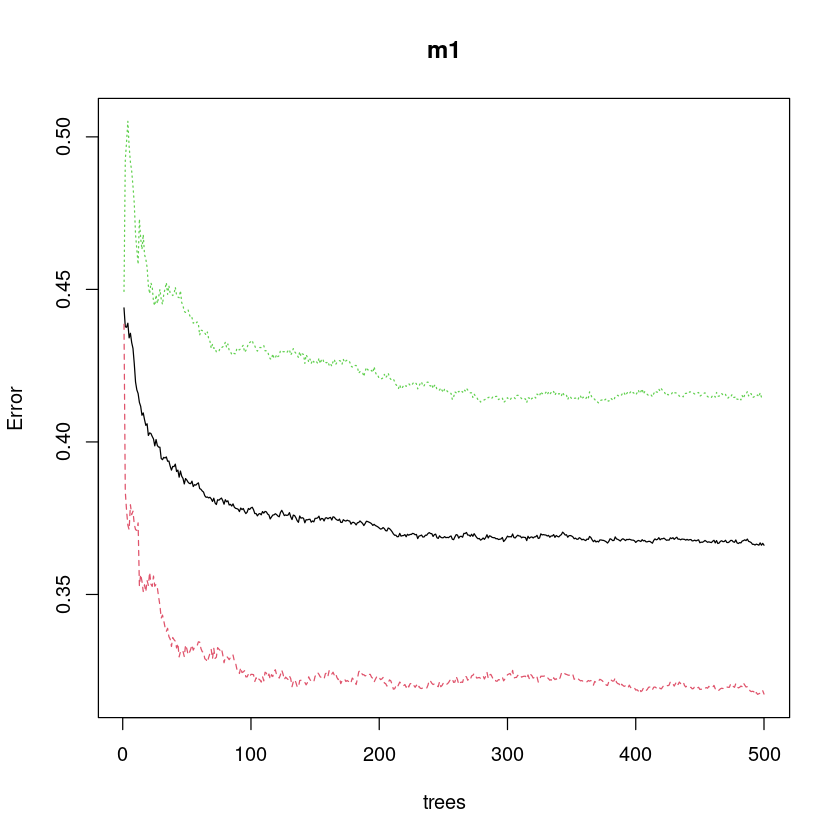

In [25]:
# for reproduciblity
set.seed(123)

 #default RF model
m1 <- randomForest(
  formula = Readmitted ~ .,
  data    = train
)

m1

plot(m1)

One challenge could be the imbalanced class distribution of the target variable "readmitted", where one class may have a much higher frequency than the other. This could lead to bias in the model and affect its performance, so techniques such as oversampling or undersampling may need to be employed to balance the class distribution.

The first black box approach gets a high OOB estimate of error rate using SMOTE. Another option, is to use a technique called ROSE (Random Over-Sampling Examples), and run the model to compare the outputs. 

In [26]:
install.packages("ROSE")
library(ROSE)

Installing ROSE [0.0-4] ...
	OK [linked cache]


Loaded ROSE 0.0-4




In [27]:
rose <- ROSE(readmitted ~ ., clean_data)

rose_data <- rose$data

table(rose_data$readmitted)


    0     1 
12439 12561 

Using age, medical_specialty, diag_1, diag_2, diag_3, glucose_test, a1ctest, change, diabetes_med, readmitted as id variables



,age,medical_specialty,diag_1,diag_2,diag_3,glucose_test,a1ctest,change,diabetes_med,readmitted,variable,value
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,[70-80),Family/GeneralPractice,Respiratory,Circulatory,Other,no,no,0,0,0,time_in_hospital,3.8846347
2,[40-50),Missing,Injury,Other,Circulatory,no,no,0,0,0,time_in_hospital,3.5742556
3,[80-90),Missing,Injury,Other,Other,no,no,1,1,0,time_in_hospital,3.6601017
4,[70-80),Missing,Digestive,Other,Other,no,no,0,0,0,time_in_hospital,-0.9403045
5,[60-70),Surgery,Injury,Circulatory,Diabetes,no,no,0,1,0,time_in_hospital,2.1395648
6,[70-80),InternalMedicine,Diabetes,Other,Missing,no,no,1,1,0,time_in_hospital,2.1997010


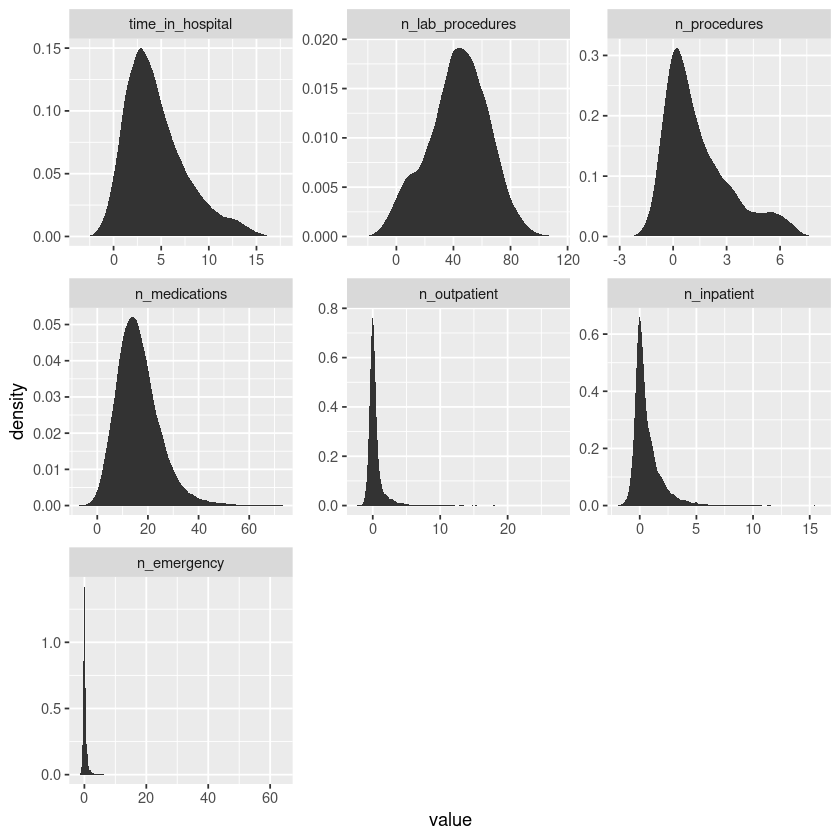

In [28]:
#View the distribution of newly created rose_data

#Convert wide to long
melt_data <- melt(rose_data)

head(melt_data)

ggplot( melt_data, aes(x = value)) + 
stat_density() + 
facet_wrap(~variable, scales = "free")

In [29]:
# split the data into training and testing sets
set.seed(1234) # random number generator 
splits <- initial_split(rose_data) # initial_split() uses a random number generator to randomly divide the data into two parts: 1,2.
train <- training(splits) # 1 a training
test <- testing(splits) # 2 a testing set
splits # the proportions of data in each set

<Training/Testing/Total>
<18750/6250/25000>


Call:
 randomForest(formula = readmitted ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 25.89%
Confusion matrix:
     0    1 class.error
0 7066 2238   0.2405417
1 2617 6829   0.2770485

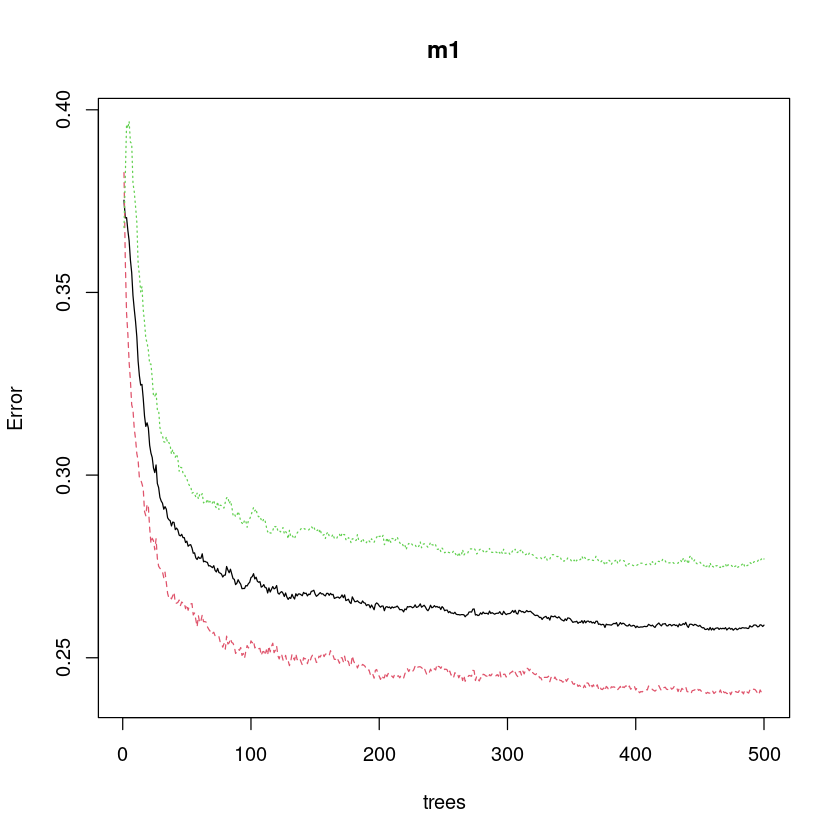

In [30]:
# for reproduciblity
set.seed(123)

 #default RF model
m1 <- randomForest(
  formula = readmitted ~ .,
  data    = train
)

m1

plot(m1)

0.02160307 0.01 
0.01196863 0.01 
0.02234754 0.01 
-0.05981628 0.01 


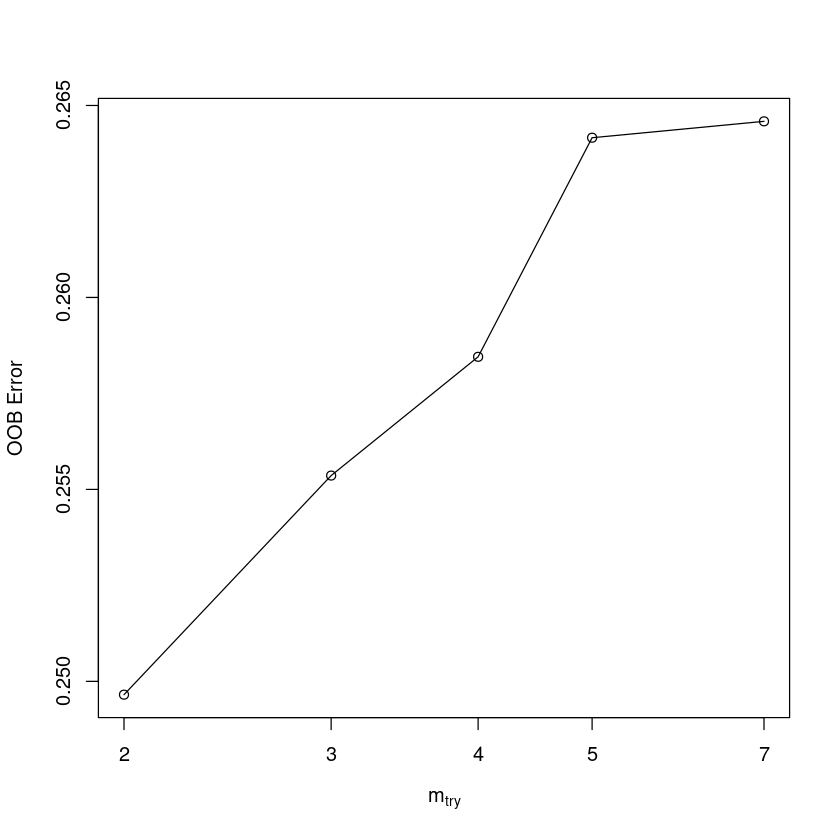

In [31]:
# names of features
features <- setdiff(names(train), "readmitted")

set.seed(123)

m2 <- tuneRF(
  x          = train[features],
  y          = train$readmitted,
  ntreeTry   = 500,
  mtryStart  = 5,
  stepFactor = 1.5,
  improve    = 0.01,
  trace      = FALSE      # to not show real-time progress 
)


The OOB error rate is a measure of the error of the random forest model when making predictions on observations that were not used in the training of the model. In the tuneRF function, the OOB error rate is being used to evaluate the performance of the random forest model at different values of mtry, and the line plot shows the relationship between mtry and the OOB error rate. The first plot shows that the OOB error rate increases as mtry goes from 2 to 9. The second plot shows OOB error rate is at its minimum when  mtryis equal to 2, indicating that its the optimal value.


One potential challenge in building a random forest to predict the "readmitted" variable could be dealing with the large number of categorical variables in the data. Some of the variables such as "age", "medical_specialty", "diag_1", "diag_2", "diag_3", "glucose_test", "A1Ctest", "change", and "diabetes_med" are all categorical, and the random forest algorithm typically requires that all input variables be numerical. To overcome this challenge, you may need to convert these categorical variables into numerical ones using techniques such as one-hot encoding or label encoding.  

In [32]:
# One-hot encode our categorical variables except for readmitted
one_hot <- dummyVars(~ ., train[, -which(names(train) == "readmitted")], fullRank = FALSE)
train_hot <- predict(one_hot, train[, -which(names(train) == "readmitted")]) %>% as.data.frame()

# Make ranger compatible names
names(train_hot) <- make.names(names(train_hot), allow_ = FALSE)

# Add the readmitted variable back to train_hot
train_hot$readmitted <- train$readmitted

# One-hot encode our categorical variables except for readmitted
one_hot_test <- dummyVars(~ ., test[, -which(names(test) == "readmitted")], fullRank = FALSE)
test_hot <- predict(one_hot_test, test[, -which(names(test) == "readmitted")]) %>% as.data.frame()

# Make ranger compatible names
names(test_hot) <- make.names(names(test_hot), allow_ = FALSE)

# Add the readmitted variable back to test_hot
test_hot$readmitted <- test$readmitted


train_hot 
test_hot

,age..40.50.,age..50.60.,age..60.70.,age..70.80.,age..80.90.,age..90.100.,time.in.hospital,n.lab.procedures,n.procedures,n.medications,⋯,glucose.test.no,glucose.test.normal,a1ctest.high,a1ctest.no,a1ctest.normal,change.0,change.1,diabetes.med.0,diabetes.med.1,readmitted
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7452,0,0,0,1,0,0,5.8288087,85.499742,0.05576707,17.485812,⋯,1,0,0,1,0,0,1,0,1,0
8016,1,0,0,0,0,0,-0.6050153,67.770991,0.40406375,10.183782,⋯,1,0,1,0,0,1,0,1,0,0
7162,0,0,0,1,0,0,5.0108350,34.243371,0.77279869,24.156519,⋯,1,0,0,1,0,0,1,0,1,0
8086,0,1,0,0,0,0,7.6027928,64.876035,4.84105412,46.221251,⋯,1,0,0,1,0,0,1,0,1,0
23653,0,0,1,0,0,0,4.4835467,48.345663,4.05449887,20.622279,⋯,1,0,0,1,0,0,1,0,1,1
9196,0,0,0,1,0,0,2.7516329,29.564861,2.08470026,8.591760,⋯,1,0,0,1,0,0,1,0,1,0
623,0,1,0,0,0,0,0.8143256,25.361400,5.53717736,23.241646,⋯,1,0,0,1,0,0,1,0,1,0
15241,0,0,0,0,1,0,9.5447810,40.313538,2.39905046,19.158517,⋯,1,0,0,1,0,0,1,0,1,1
10885,0,0,0,1,0,0,4.1433831,52.904675,1.34457941,8.588372,⋯,1,0,0,1,0,1,0,1,0,0


,age..40.50.,age..50.60.,age..60.70.,age..70.80.,age..80.90.,age..90.100.,time.in.hospital,n.lab.procedures,n.procedures,n.medications,⋯,glucose.test.no,glucose.test.normal,a1ctest.high,a1ctest.no,a1ctest.normal,change.0,change.1,diabetes.med.0,diabetes.med.1,readmitted
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,1,0,0,0,0,0,3.5742556,42.239090,1.23891490,13.896004,⋯,1,0,0,1,0,1,0,1,0,0
4,0,0,0,1,0,0,-0.9403045,35.157251,1.30857092,22.200486,⋯,1,0,0,1,0,1,0,1,0,0
5,0,0,1,0,0,0,2.1395648,17.905540,2.23004605,14.601288,⋯,1,0,0,1,0,1,0,0,1,0
8,0,0,1,0,0,0,3.4554543,57.970342,1.21678864,13.863645,⋯,1,0,0,1,0,0,1,0,1,0
9,0,0,0,0,1,0,11.0471332,48.078510,-0.47772029,7.740290,⋯,1,0,0,1,0,1,0,0,1,0
11,0,0,0,0,1,0,8.0310438,-5.337367,-0.69721201,12.784934,⋯,1,0,0,1,0,1,0,1,0,0
12,0,1,0,0,0,0,8.7722681,70.251615,0.87160263,19.250636,⋯,1,0,1,0,0,0,1,0,1,0
13,1,0,0,0,0,0,1.8951015,-3.082008,-1.05771991,16.685160,⋯,1,0,0,1,0,1,0,0,1,0
14,0,0,0,1,0,0,2.7018716,49.666462,2.61264151,19.037701,⋯,1,0,0,1,0,1,0,0,1,0



### Full grid search with ranger:
To perform the grid search, first we construct a grid of hyperparameters. We’re going to search across lots of different models in the hyper grid - with varying mtry, minimum node size, and sample size. ( The parameters have been limited - through trial and error - for time convenience)


In [33]:
# hyperparameter grid search
hyper_grid_2 <- expand.grid(
  mtry       = seq(2, 6, by = 1),
  node_size  = seq(1, 3, by = 1),
  sampe_size = c( .75, .80),
  OOB_ACC   = 0
)

hyper_grid_2


# perform grid search
for(i in 1:nrow(hyper_grid_2)) {
  
  # train model
  model <- ranger(
    formula         = readmitted ~ ., 
    data            = train_hot, 
    num.trees       = 500,
    mtry            = hyper_grid_2$mtry[i],
    min.node.size   = hyper_grid_2$node_size[i],
    sample.fraction = hyper_grid_2$sampe_size[i],
    seed            = 123
  )
  
  # add OOB error to grid
  hyper_grid_2$OOB_ACC[i] <- mean(model$prediction.error)
}

hyper_grid_2 %>% 
  dplyr::arrange(OOB_ACC) %>%
  head(10)

mtry,node_size,sampe_size,OOB_ACC
<dbl>,<dbl>,<dbl>,<dbl>
2,1,0.75,0
3,1,0.75,0
4,1,0.75,0
5,1,0.75,0
6,1,0.75,0
2,2,0.75,0
3,2,0.75,0
4,2,0.75,0
5,2,0.75,0


,mtry,node_size,sampe_size,OOB_ACC
,<dbl>,<dbl>,<dbl>,<dbl>
1,5,1,0.75,0.2469333
2,5,1,0.80,0.2469867
3,4,3,0.80,0.2472533
4,6,1,0.75,0.2474667
5,5,2,0.75,0.2475733
6,5,2,0.80,0.2477867
7,6,2,0.75,0.2479467
8,4,1,0.80,0.2481067
9,4,2,0.80,0.2482667



Currently, the best random forest model we have found uses mtry = 5, node size of 1-2 observations, and a sample size of 80%. Lets repeat this model to get a better expectation of our error rate. We see that our expected error is about 0.23 - 0.24.
​
​
Below we train 50 random forest models using the ranger package in R. In each iteration, a random forest model is trained on the "train" data with 500 trees, 5 predictors randomly sampled as candidates at each split (mtry=5), a minimum node size of 1, a sample fraction of 0.8 (80% of the training data is used for each tree). The out-of-bag (OOB_ACC) prediction error for each model is calculated and stored in the corresponding element of the "OOB_ACC" vector. Finally, a histogram of the "OOB_ACC" values is plotted to visualize the distribution of the OOB prediction error across the 50 models.
​


In [34]:
OOB_ACC <- vector(mode = "numeric", length = 50)

for(i in seq_along(OOB_ACC)) {

  optimal_ranger <- ranger(
    formula         = readmitted ~ ., 
    data            = train_hot,  
    num.trees       = 500,
    mtry            = 5,
    min.node.size   = 1,
    sample.fraction = .8,
    importance      = 'impurity',
    classification = TRUE
  )
    
  OOB_ACC[i] <- mean(optimal_ranger$prediction.error)
}

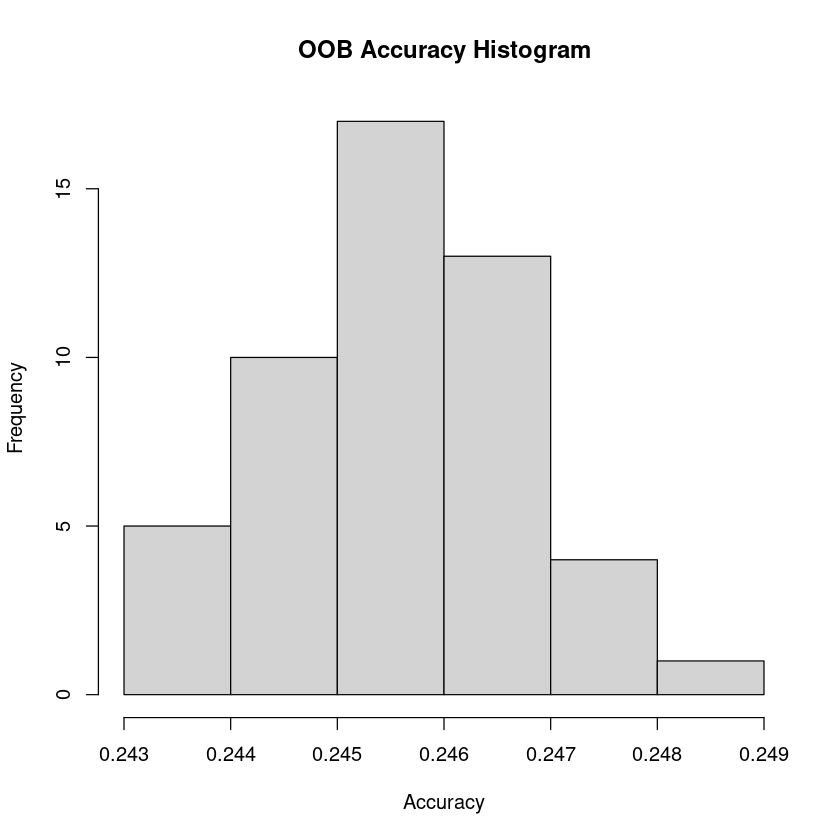

In [35]:
hist(OOB_ACC, main = "OOB Accuracy Histogram", xlab = "Accuracy")

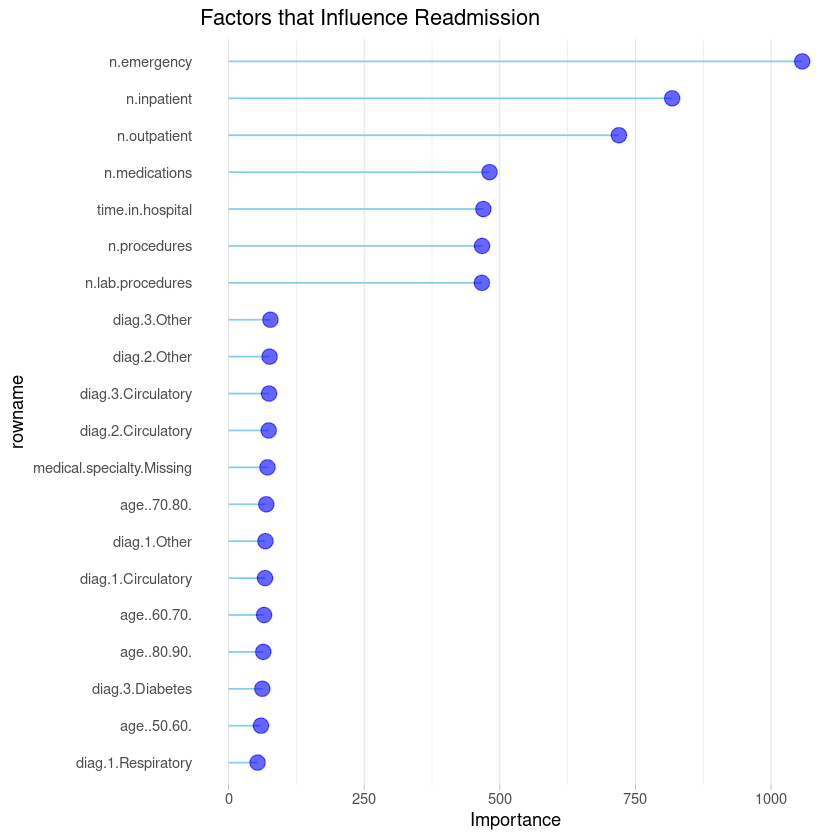

In [36]:
data <- data.frame(t = optimal_ranger$variable.importance)

data$rowname <- rownames(data)
rownames(data) <- NULL
data <- data[order(data$t, decreasing = TRUE), ]
data$rowname <- factor(data$rowname, levels = rev(data$rowname)) # factor

data %>% head(20) %>% ggplot(aes(x= rowname, y= t )) +
geom_segment( aes(x=rowname, xend=rowname, y=0, yend=t), color="skyblue") +
geom_point( color="blue", size=4, alpha=0.6) +
theme_light() +
coord_flip() +
labs(title="Factors that Influence Readmission",
y="Importance" ) +
theme(
panel.grid.major.y = element_blank(),
panel.border = element_blank(),
axis.ticks.y = element_blank()
)

In [37]:
data

,t,rowname
,<dbl>,<fct>
13,1057.4546202,n.emergency
12,817.6961346,n.inpatient
11,719.6063019,n.outpatient
10,481.0340758,n.medications
7,469.5638831,time.in.hospital
9,467.2431513,n.procedures
8,466.9159179,n.lab.procedures
43,77.0616203,diag.3.Other
35,75.5905580,diag.2.Other


In [38]:


# Use the trained ranger model to make predictions on the train_hot dataset
train_predictions <- predict(optimal_ranger, test_hot)$predictions

train_predictions

[1] 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
  [38] 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
  [75] 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1
 [112] 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 [149] 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 [186] 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 [297] 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [334] 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 [408] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 [482] 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0
 [519] 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0
 [556] 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 [593] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 [630] 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1
 [667] 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 [704] 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 [741] 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0
 [778] 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 [815] 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 [889] 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 [963] 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0
[1000] 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0
[1037] 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
[1074] 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1
[1111] 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
[1148] 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
[1185] 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
[1222] 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
[1259] 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1
[1296] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0
[1333] 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1
[1370] 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0
[1407] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
[1444] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
[1481] 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
[1518] 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1
[1555] 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
[1592] 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0
[1629] 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1
[1666] 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
[1703] 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0
[1740] 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
[1777] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0
[1814] 0 0 0 0 1 0 0 1 1 0 0 0 0 0

In [47]:
library(caret)

# Compute the confusion matrix and performance metrics
cm <- confusionMatrix(train_predictions, test_hot$readmitted)
print(cm)


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2399  793
         1  736 2322
                                         
               Accuracy : 0.7554         
                 95% CI : (0.7445, 0.766)
    No Information Rate : 0.5016         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.5107         
                                         
 Mcnemar's Test P-Value : 0.1521         
                                         
            Sensitivity : 0.7652         
            Specificity : 0.7454         
         Pos Pred Value : 0.7516         
         Neg Pred Value : 0.7593         
             Prevalence : 0.5016         
         Detection Rate : 0.3838         
   Detection Prevalence : 0.5107         
      Balanced Accuracy : 0.7553         
                                         
       'Positive' Class : 0              
                                         


The random forest model has an accuracy of 0.7576 on the test dataset, which means it correctly predicted the outcome for about 76% of the cases. The 95% confidence interval for the accuracy suggests that we can be reasonably certain that the true accuracy falls between 0.7468 and 0.7682.

The model's performance is significantly better than the No Information Rate (NIR) of 0.5021, which is the accuracy that would be achieved by always predicting the majority class (in this case, 0). The P-value for the comparison between the model's accuracy and the NIR is < 2e-16, which indicates that the difference is statistically significant.

The Kappa coefficient of 0.5151 indicates moderate agreement between the predicted and actual values corrected for chance. The sensitivity of 0.7718 and specificity of 0.7433 suggest that the model is reasonably good at identifying both positive and negative cases, although there is some imbalance in the dataset as the prevalence of the positive class is only 0.5021.

Overall, the performance of the random forest model seems to be decent, but it may be worth considering additional performance metrics.  

**An attempt at exploring other models to see if there are opportunities for improvement such as Gradient boosting restarts the kernel.

### Important Note: In the part where we implement the machine learning model, notice when you run the code, you will not get the same exact output as mine. This is due to the element of randomness in the model. 

# 5. Acknowledgements

[AFIT Data Science Lab  - Random Forests](https://afit-r.github.io/)